<h1 style="text-align: center; font-weight: bold;">Artificial Intelligence Course - Fall 1402</h1>
<h1 style="text-align: center; font-weight: bold;">Soheil Hajian Manesh 810100119</h1>
<h1 style="text-align: center; font-weight: bold;">Computer Assignment 4 - Machine Learning </h1>

# Problem Description
In this project we should predicts the number of customers' purchases with machine learning algorithm.In 1st phase we create a Linear Regression Model manually.In 2nd phase create Multiple Regression Model using gradient discent and in 3rd phase trying to train model using Scikit-learn library.

In [179]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import LabelEncoder, scale, MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import linear_model, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from mlxtend.evaluate import bias_variance_decomp
from xgboost import XGBClassifier

In [2]:
originalDataSet = pd.read_csv("marketing_campaign.csv")
dataSet = originalDataSet.copy()
dataSet.drop(dataSet.columns[0], axis=1, inplace=True)
median = dataSet["NumPurchases"].median()
dataSet["PurchaseRate"] = dataSet["NumPurchases"].apply(
    lambda x: "HIGH" if x > median else "LOW"
)

display(dataSet)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoffee,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,NumPurchases,UsedCampaignOffer,PurchaseRate
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635.0,88,546,172,88,88.0,NaN,0,25,1,HIGH
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,NaN,1,6,2,1,6.0,5.0,0,6,0,LOW
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,NaN,49,127,111,21,42.0,NaN,0,21,0,HIGH
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11.0,4,20,10,3,5.0,6.0,0,8,0,LOW
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173.0,43,118,46,27,15.0,5.0,0,19,0,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709.0,43,182,42,118,247.0,5.0,0,18,0,HIGH
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406.0,0,30,0,0,8.0,7.0,0,22,1,HIGH
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908.0,48,217,32,12,24.0,6.0,0,19,1,HIGH
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428.0,30,214,80,30,61.0,NaN,0,23,0,HIGH


In [3]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2240 non-null   int64  
 1   Year_Birth         2240 non-null   int64  
 2   Education          2240 non-null   object 
 3   Marital_Status     2240 non-null   object 
 4   Income             2017 non-null   float64
 5   Kidhome            2240 non-null   int64  
 6   Teenhome           2240 non-null   int64  
 7   Dt_Customer        2240 non-null   object 
 8   Recency            2240 non-null   int64  
 9   MntCoffee          2035 non-null   float64
 10  MntFruits          2240 non-null   int64  
 11  MntMeatProducts    2240 non-null   int64  
 12  MntFishProducts    2240 non-null   int64  
 13  MntSweetProducts   2240 non-null   int64  
 14  MntGoldProds       2227 non-null   float64
 15  NumWebVisitsMonth  2040 non-null   float64
 16  Complain           2240 

In [5]:
dataSet.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoffee,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,NumPurchases,UsedCampaignOffer
count,2240.000000,2240.000000,2017.000000,2240.000000,2240.000000,2240.000000,2035.000000,2240.000000,2240.000000,2240.000000,2240.000000,2227.000000,2040.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52297.080317,0.437946,0.506250,49.109375,304.239312,26.302232,166.950000,37.525446,27.062946,43.847777,5.326961,0.009375,14.862054,0.271875
std,3246.662198,11.984069,25543.108215,0.563666,0.544538,28.962453,337.515534,39.773434,225.715373,54.628979,41.280498,51.897098,2.439349,0.096391,7.677173,0.445025
min,0.000000,1893.000000,2447.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35340.000000,0.000000,0.000000,24.000000,23.000000,1.000000,16.000000,3.000000,1.000000,9.000000,3.000000,0.000000,8.000000,0.000000
50%,5458.500000,1970.000000,51369.000000,0.000000,0.000000,49.000000,177.000000,8.000000,67.000000,12.000000,8.000000,24.000000,6.000000,0.000000,15.000000,0.000000
75%,8427.750000,1977.000000,68316.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000,7.000000,0.000000,21.000000,1.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,20.000000,1.000000,44.000000,1.000000


In [6]:
null_analysis_data = []
for col in dataSet.columns:
    nullCount = dataSet[col].isnull().sum()
    nullRatio = round(nullCount / dataSet.shape[0],2)
    null_analysis_data.append({"Feature": col, "Count": nullCount, "Ratio": nullRatio})
nullAnalysisTable = pd.DataFrame(null_analysis_data)
display(nullAnalysisTable)

,Feature,Count,Ratio
0,ID,0,0.00
1,Year_Birth,0,0.00
2,Education,0,0.00
3,Marital_Status,0,0.00
4,Income,223,0.10
5,Kidhome,0,0.00
6,Teenhome,0,0.00
7,Dt_Customer,0,0.00
8,Recency,0,0.00
9,MntCoffee,205,0.09


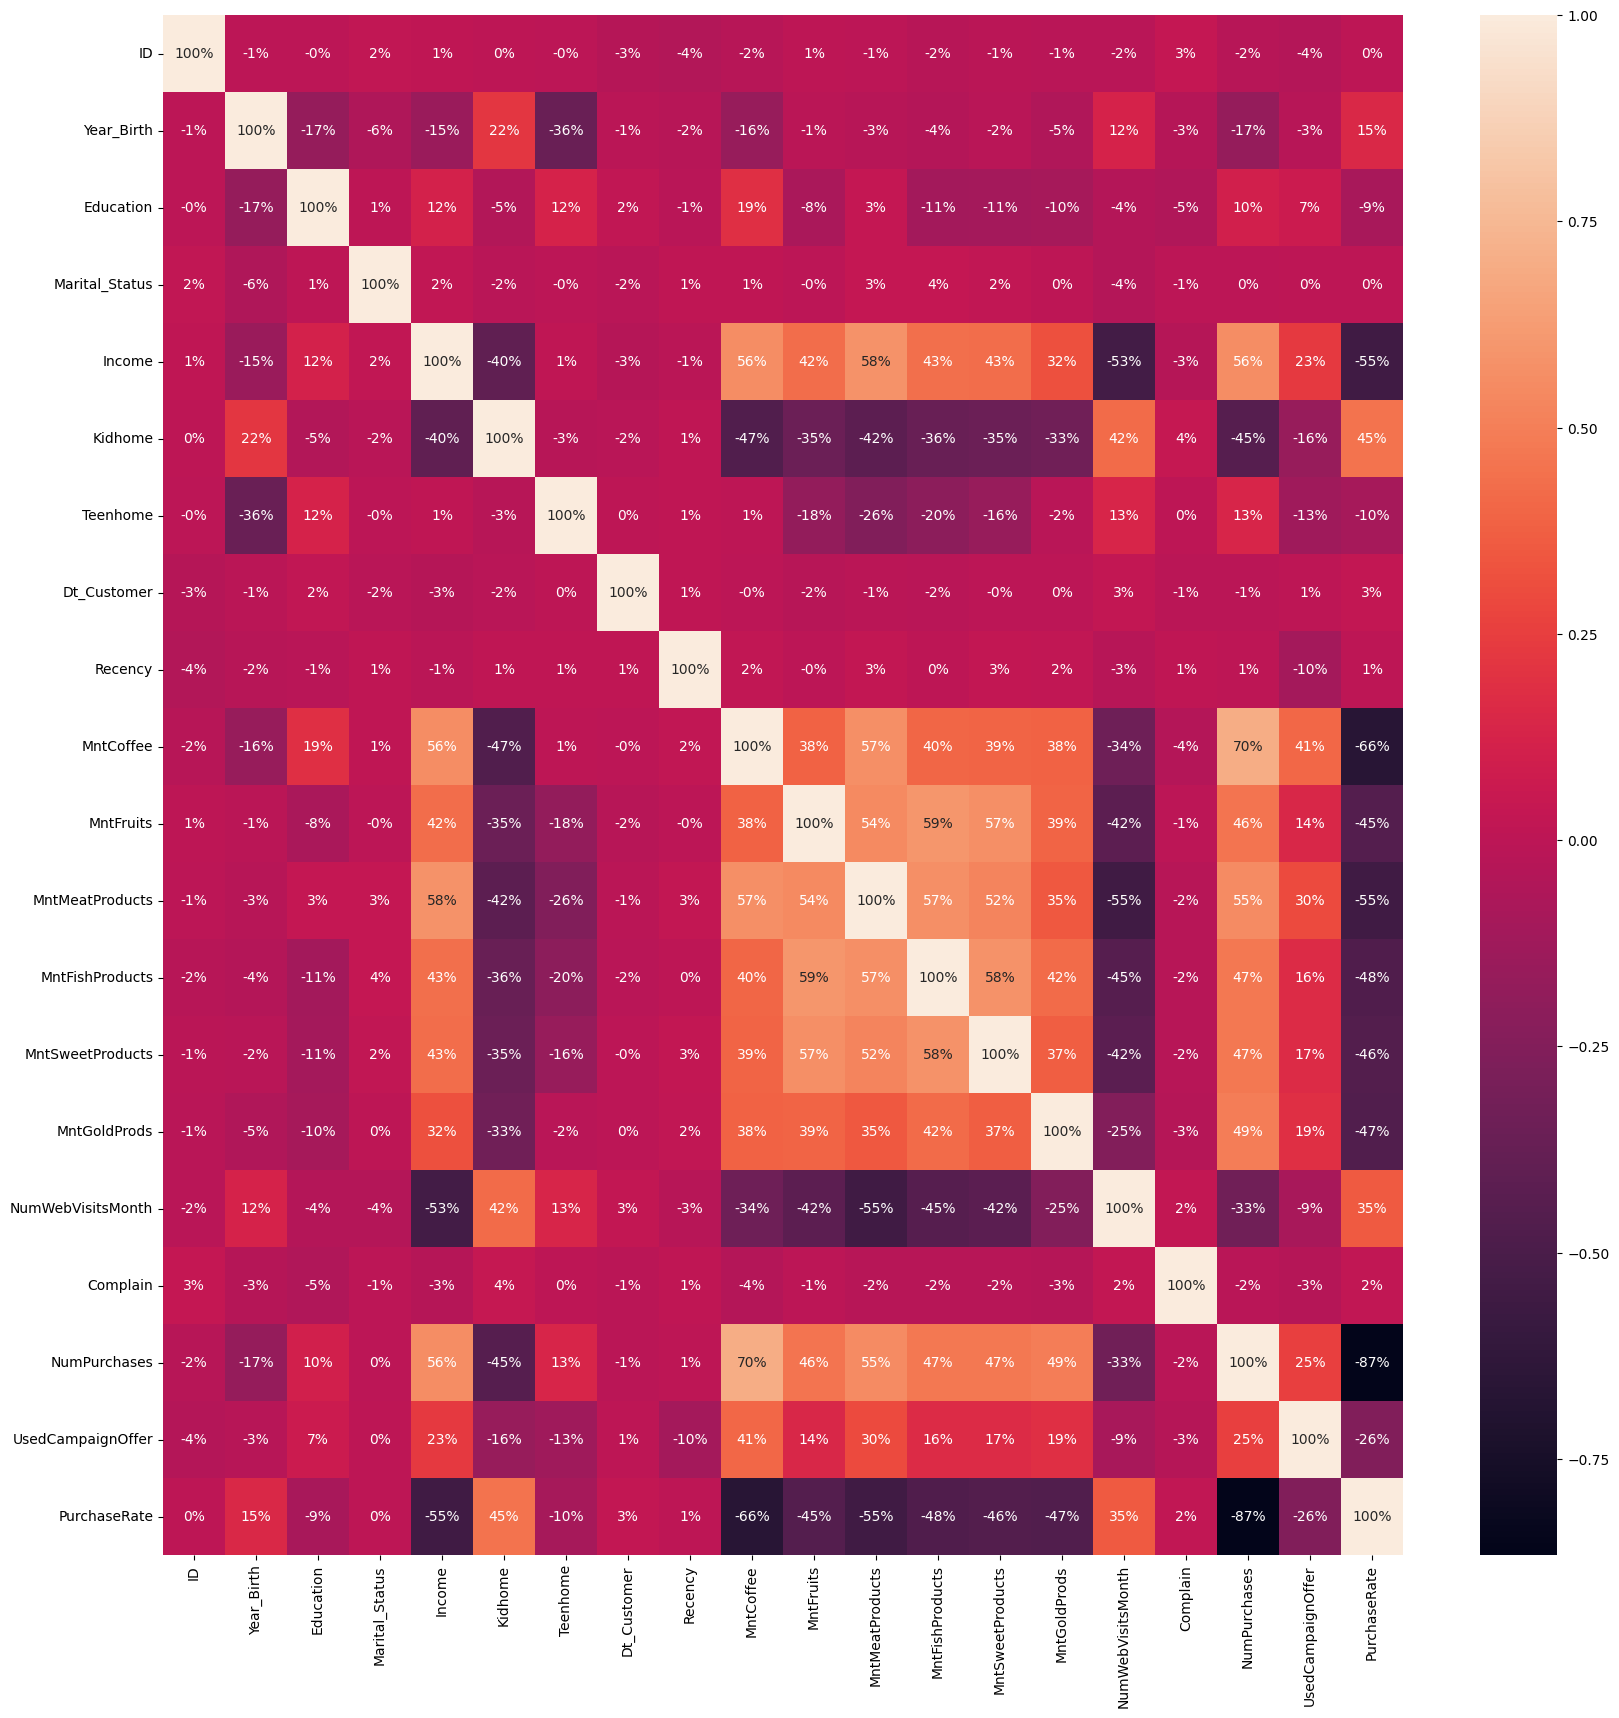

4 best features with most correlation values : 
MntCoffee           0.695131
Income              0.561948
MntMeatProducts     0.554004
MntGoldProds        0.493939
MntSweetProducts    0.472459
Name: NumPurchases, dtype: float64


In [78]:
label_encoder = LabelEncoder()
for col in dataSet.select_dtypes(include=[object]).columns:
    dataSet[col] = label_encoder.fit_transform(dataSet[col])
corrMatrix = dataSet.corr()
plt.figure(figsize=(20, 20))
sb.heatmap(corrMatrix, annot=True, fmt=".0%")
plt.show()
sortedTargetCorr = (
    corrMatrix["NumPurchases"]
    .drop(labels=["NumPurchases"])
    .sort_values(ascending=False)
)
bestFeatures = sortedTargetCorr.head(5)
worstFeatures = sortedTargetCorr[sortedTargetCorr.index != "PurchaseRate"]
worstFeatures = worstFeatures[worstFeatures < 0.1]
print("4 best features with most correlation values : ")
print(bestFeatures)

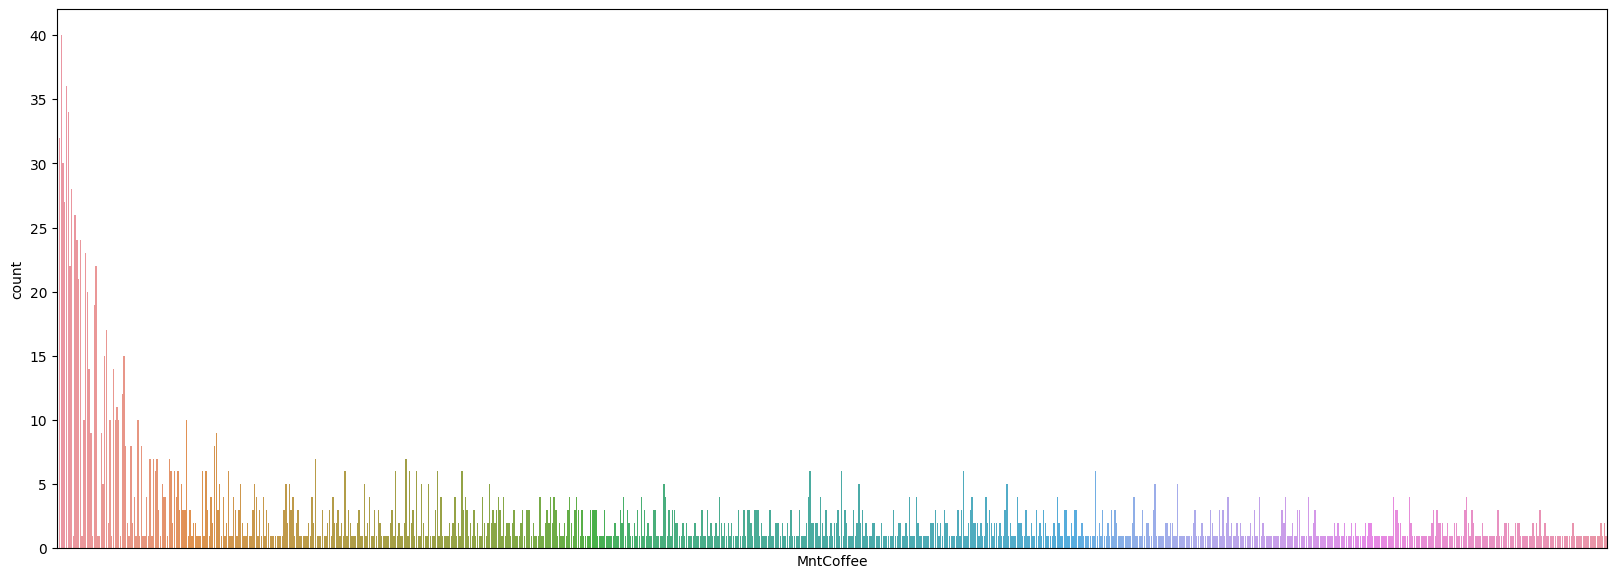

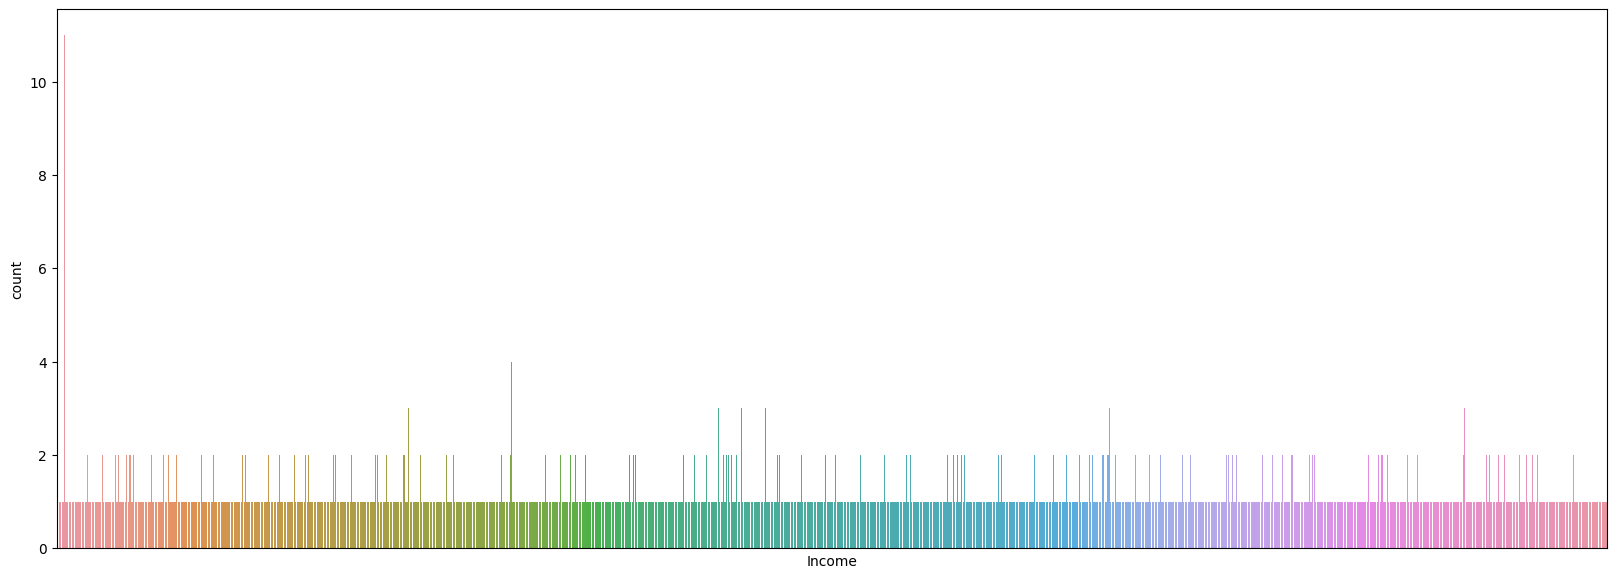

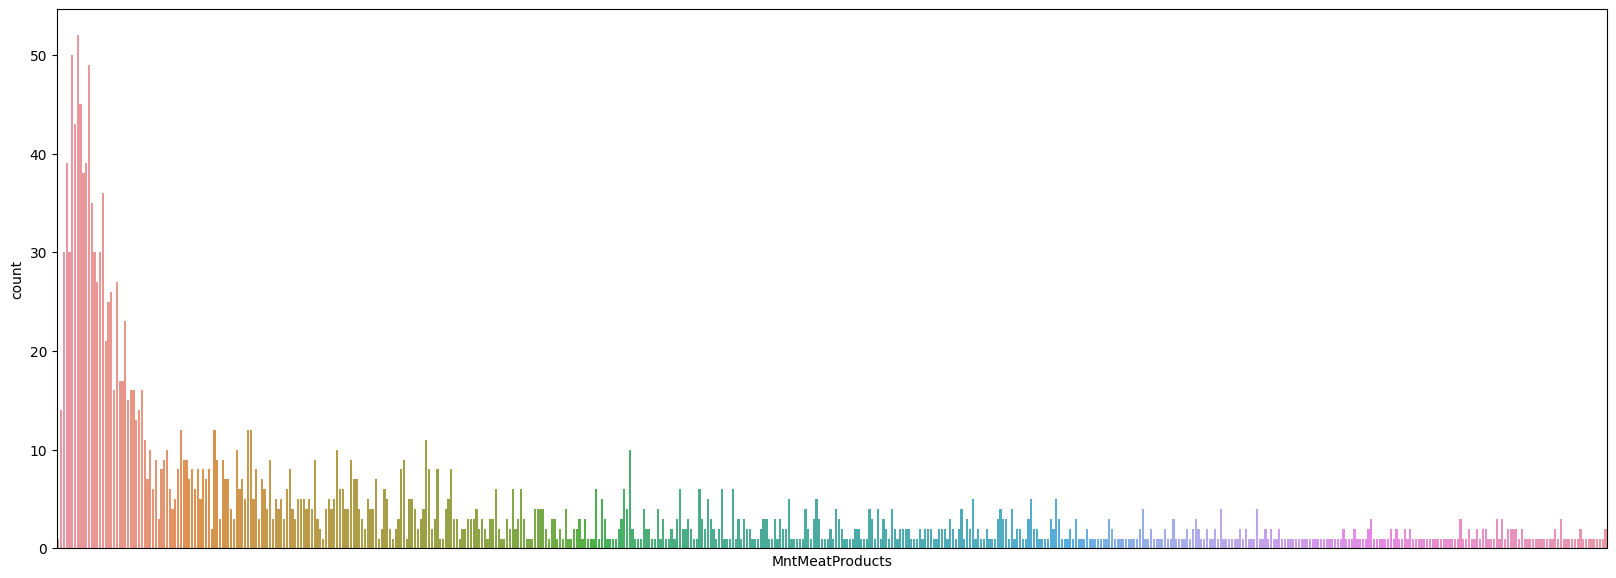

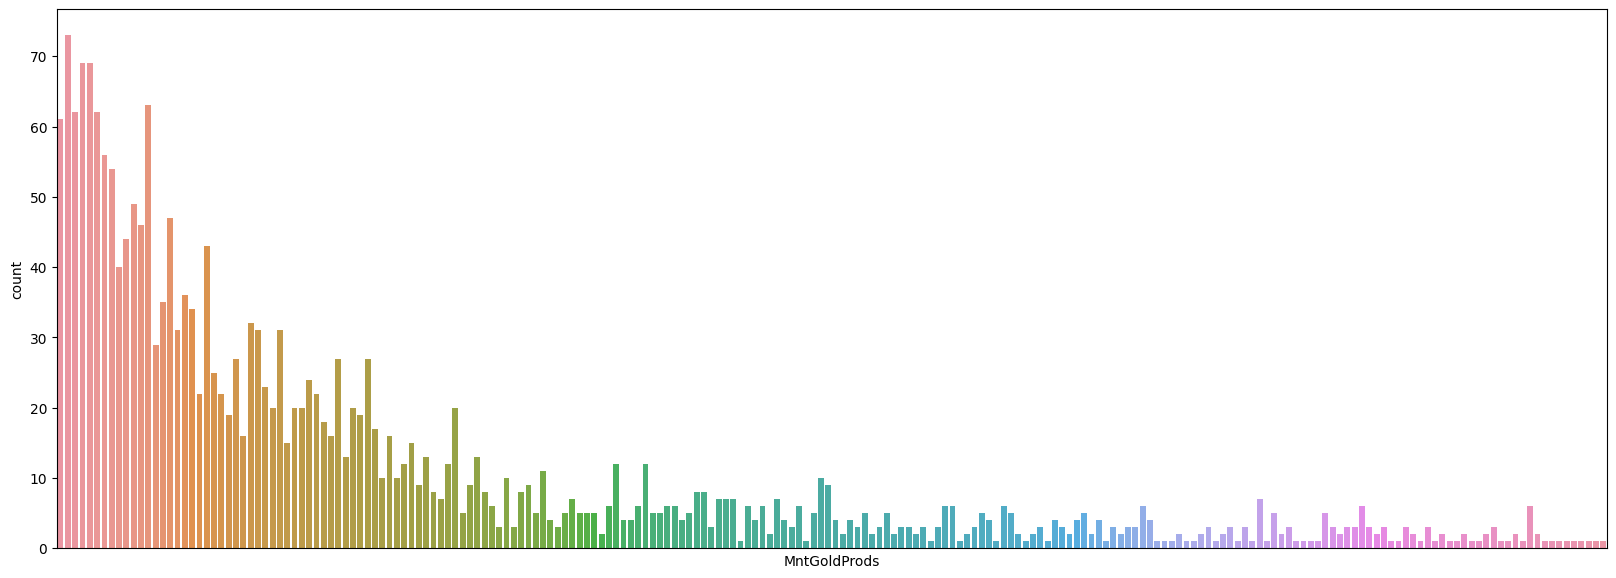

In [54]:
for feature in bestFeatures.head(4).index:
    plt.figure(figsize=(20, 7))
    plt.xticks(rotation=90)
    sb.countplot(data=dataSet, x=feature)
    plt.xticks(ticks=[], labels=[])

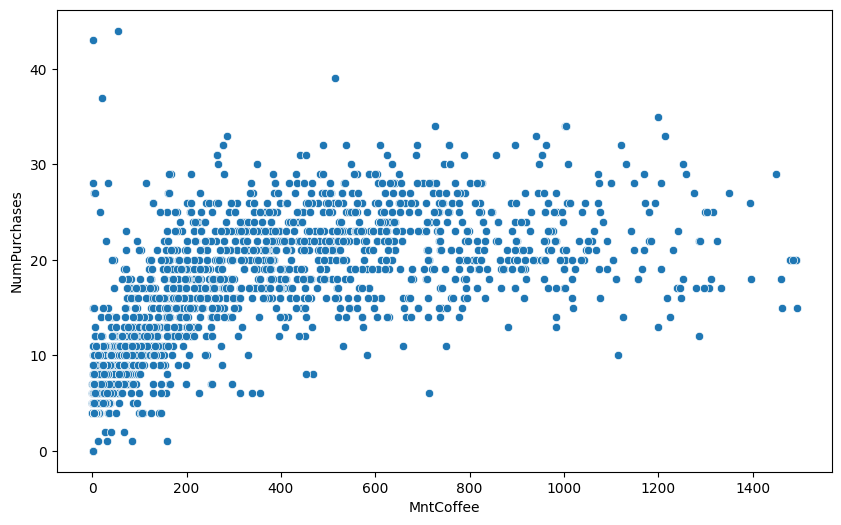

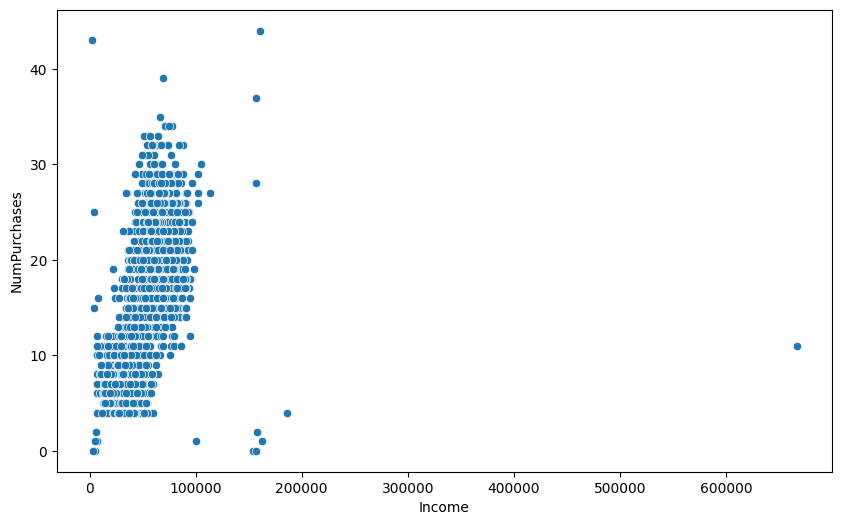

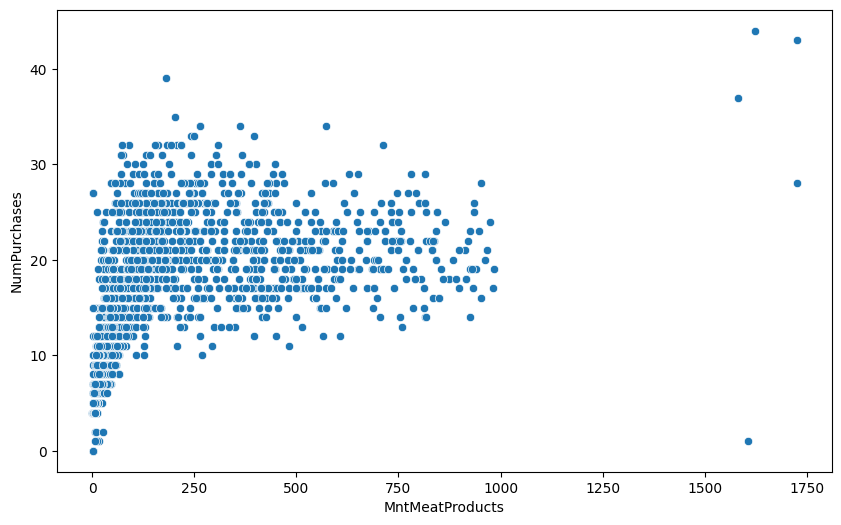

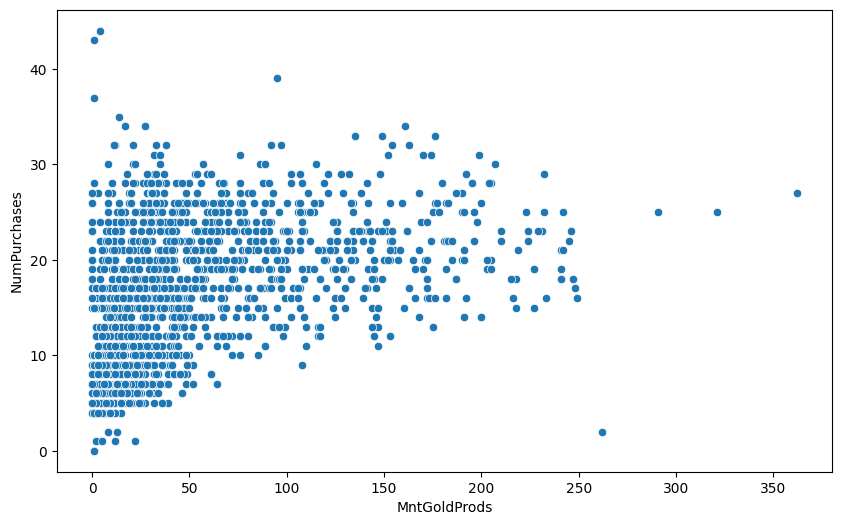

In [55]:
for feature in bestFeatures.head(4).index:
    plt.figure(figsize=(10,6))
    sb.scatterplot(data=dataSet, x=feature, y="NumPurchases")

In [188]:
def draw_histograms(df, title):
    fig, axs = plt.subplots(5, 4)
    fig.suptitle(title, fontsize=25)
    fig.set_figheight(20)
    fig.set_figwidth(25)
    i = 0
    for col in df.columns:
        df[col].hist(ax=axs[int(i / 4)][(i % 4)])
        axs[int(i / 4)][(i % 4)].set_title(col)
        i += 1
    plt.show()

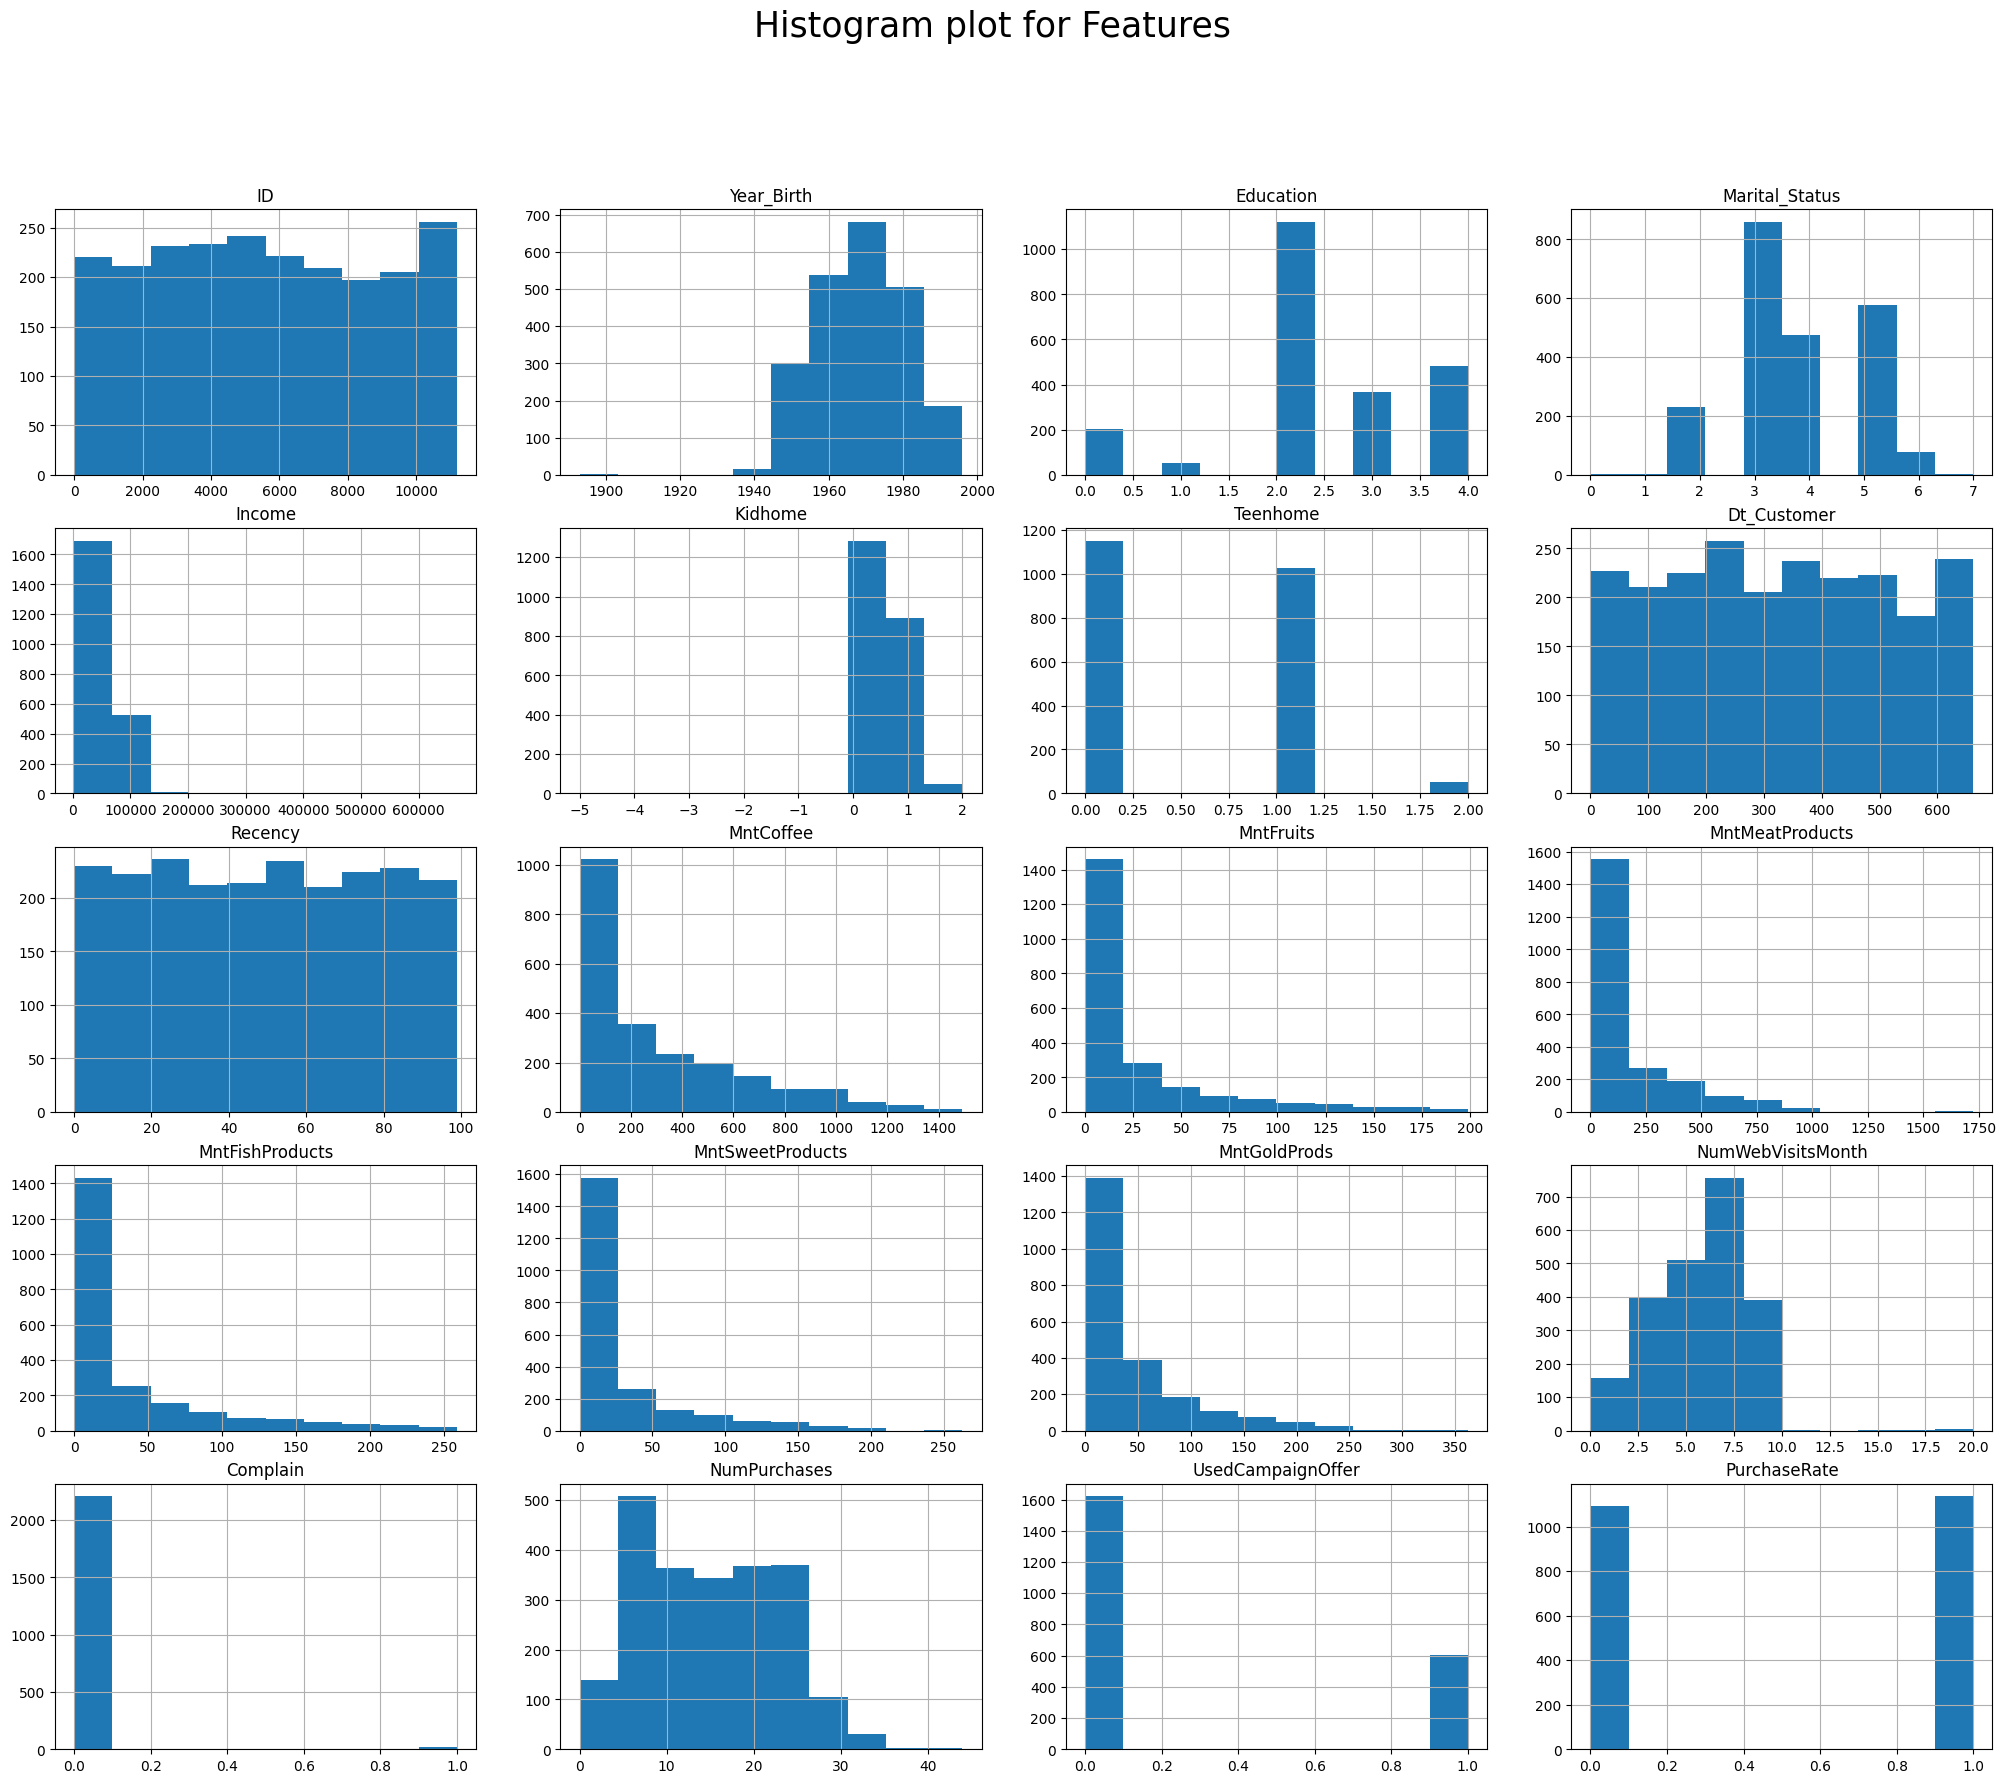

In [190]:
draw_histograms(dataSet,"Histogram plot for Features")

## Preprocessing

### Question 7: Ways to handle missing values.
There are many ways to handle missing values, I describe some of them below:   
- Deleting the entire row:     
    > If a row has many missing values, you can drop the entire row.The disadvantage of this method is one might end up deleting some useful data from the dataset.
- Deleting the entire column:
    > If a certain column has many missing values, then you can choose to drop the entire column.The disadvantage of this method is same as previous one.
- Replacing with the mean:
    > If there are outliers, then the mean will not be appropriate. In such cases, outliers need to be treated first.
- Replacing with mode:
    > It is used in the case of categorical features.
- Replacing with median:
    > It’s better to use the median value for imputation in the case of outliers.     
- Nearest Neighbors Imputations (KNNImputer):
    > Missing values are imputed using the k-Nearest Neighbors approach, where a Euclidean distance is used to find the nearest neighbors.

Replacing missing values with mean,median or mode have risk of losing the variance and changing the distribution of the data.The best spproach is `KNNImputer`.

From observation in previous phase these 4 features have missing values:   
1. Income
2. MntCoffee
3. MntGoldProds
4. NumWebVisitsMonth
I am trynig to handle missing values using `Delete row` and  `KNNImputer` approach.For `MntGoldProds` column because only 13 rows have missing value I delete these rows and then with KNNImputer fill other missing values.

In [56]:
dataSet.dropna(subset=['MntGoldProds'],inplace=True)

In [57]:
imputeKnn = KNNImputer(n_neighbors=4)
imputed = imputeKnn.fit_transform(dataSet)
dataSet = pd.DataFrame(imputed, columns=dataSet.columns)
display(dataSet)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoffee,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,NumPurchases,UsedCampaignOffer,PurchaseRate
0,5524.0,1957.0,2.0,4.0,58138.0,0.0,0.0,80.0,58.0,635.00,88.0,546.0,172.0,88.0,88.0,1.50,0.0,25.0,1.0,0.0
1,2174.0,1954.0,2.0,4.0,46344.0,1.0,1.0,157.0,38.0,32.75,1.0,6.0,2.0,1.0,6.0,5.00,0.0,6.0,0.0,1.0
2,4141.0,1965.0,2.0,5.0,71613.0,0.0,0.0,444.0,26.0,102.75,49.0,127.0,111.0,21.0,42.0,6.25,0.0,21.0,0.0,0.0
3,6182.0,1984.0,2.0,5.0,26646.0,1.0,0.0,199.0,26.0,11.00,4.0,20.0,10.0,3.0,5.0,6.00,0.0,8.0,0.0,1.0
4,5324.0,1981.0,4.0,3.0,58293.0,1.0,0.0,390.0,94.0,173.00,43.0,118.0,46.0,27.0,15.0,5.00,0.0,19.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,10870.0,1967.0,2.0,3.0,61223.0,0.0,1.0,272.0,46.0,709.00,43.0,182.0,42.0,118.0,247.0,5.00,0.0,18.0,0.0,0.0
2223,4001.0,1946.0,4.0,5.0,64014.0,2.0,1.0,207.0,56.0,406.00,0.0,30.0,0.0,0.0,8.0,7.00,0.0,22.0,1.0,0.0
2224,7270.0,1981.0,2.0,2.0,56981.0,0.0,0.0,521.0,91.0,908.00,48.0,217.0,32.0,12.0,24.0,6.00,0.0,19.0,1.0,0.0
2225,8235.0,1956.0,3.0,5.0,69245.0,0.0,1.0,500.0,8.0,428.00,30.0,214.0,80.0,30.0,61.0,5.50,0.0,23.0,0.0,0.0


### Question 9 : Why Use Normalization and Standardizing?
`Normalization` is a data preprocessing technique used to adjust the values of features in a dataset to a common scale. This is done to facilitate data analysis and modeling, and to reduce the impact of different scales on the accuracy of machine learning models.Useful when the distribution of the data is unknown or not Gaussian.     
Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between a fixed range for example 0 and 1. It is also known as Min-Max scaling.        
Here’s the formula for normalization:   $$X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}$$
`Standardization` is another scaling method where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero, and the resultant distribution has a unit standard deviation.     
Here’s the formula for normalization: $$X_{std} = \frac{X - \mu}{\sigma}$$

In [186]:
standardized = scale(dataSet.drop(axis=1, columns=["NumPurchases", "PurchaseRate"]))
standardized = pd.DataFrame(
    standardized,
    columns=dataSet.drop(axis=1, columns=["NumPurchases", "PurchaseRate"]).columns,
)
scaler = MinMaxScaler()
normalized = scaler.fit_transform(standardized)
normalized = pd.DataFrame(
    normalized,
    columns=dataSet.drop(axis=1, columns=["NumPurchases", "PurchaseRate"]).columns,
)
normalized["NumPurchases"] = dataSet["NumPurchases"]
normalized["PurchaseRate"] = dataSet["PurchaseRate"]
normalized.describe()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoffee,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,UsedCampaignOffer,NumPurchases,PurchaseRate
count,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.00000,2227.000000,2227.000000,2227.000000
mean,0.500457,0.736173,0.598451,0.532876,0.074727,0.776766,0.253256,0.494482,0.496437,0.201101,0.132226,0.096621,0.144925,0.102627,0.121126,0.266586,0.00943,0.272564,14.851370,0.510103
std,0.289937,0.115340,0.281168,0.153881,0.037758,0.080567,0.272392,0.286992,0.292460,0.220462,0.199840,0.130825,0.211208,0.156125,0.143362,0.119000,0.09667,0.445378,7.661405,0.500010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.253999,0.640777,0.500000,0.428571,0.049305,0.714286,0.000000,0.246224,0.242424,0.017415,0.007538,0.009275,0.011583,0.003802,0.024862,0.187500,0.00000,0.000000,8.000000,0.000000
50%,0.489143,0.747573,0.500000,0.571429,0.072902,0.714286,0.000000,0.492447,0.494949,0.119893,0.040201,0.038841,0.046332,0.030418,0.066298,0.300000,0.00000,0.000000,15.000000,1.000000
75%,0.753686,0.815534,0.750000,0.714286,0.098869,0.857143,0.500000,0.732628,0.747475,0.328868,0.165829,0.134203,0.193050,0.125475,0.154696,0.350000,0.00000,1.000000,21.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,44.000000,1.000000



### Question 10: Ways for category encoding.
There are many ways to encode categorical datas, I describe some of them below:     
- Label Encoding: Assign a number to each category
    > We use this technique when the categorical feature is ordinal. In this case, retaining the order is important.For example in Education column Encoding like below:     
    > Graduation : 0     
    > Master : 1     
    > PHD : 2     
- One-Hot Encoding: assign a feature to each category
    > We use this categorical data encoding technique when the features are nominal(do not have any order).Each cell contain 0 or 1, 0 for absence and 1 for present that category.For example suppose wh have 3 different city as category:Tehran,Dubai,London so we these features:    
    > Tehran:0 1 0   
    > Dubai:1 0 0   
    > London:0 0 1   
- Binary Encoding: Encode the categories using binary numbers.
    > This method is useful when the categories don't have an order. It is somehow similar to the `One-Hot Encoding` method. For example, if we have a feature with 3 categories, we can encode them as follows:  
    > Category 1: 00  
    > Category 2: 01  
    > Category 3: 10
- Target Encoding: Encode the categories using the target mean of the categories.
    > This method is useful when the categories don't have an order. For example, if we have a feature with 3 categories, we can encode them as follows:  
    > Category 1: 0.5  
    > Category 2: 0.25  
    > Category 3: 0.75


### Question 11: Removing columns.
we can remove columns from data set that have low correlation with target columns.I drop columns with correlation lower than 20%. 

In [187]:
ppDataSet = normalized.copy()
ppDataSet.drop(columns=worstFeatures.index, inplace=True)
display(ppDataSet)

,Income,Teenhome,MntCoffee,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,UsedCampaignOffer,NumPurchases,PurchaseRate
0,0.083844,0.0,0.425318,0.442211,0.316522,0.664093,0.334601,0.243094,1.0,25.0,0.0
1,0.066088,0.5,0.021936,0.005025,0.003478,0.007722,0.003802,0.016575,0.0,6.0,1.0
2,0.104131,0.0,0.068821,0.246231,0.073623,0.428571,0.079848,0.116022,0.0,21.0,0.0
3,0.036432,0.0,0.007368,0.020101,0.011594,0.038610,0.011407,0.013812,0.0,8.0,1.0
4,0.084078,0.0,0.115874,0.216080,0.068406,0.177606,0.102662,0.041436,0.0,19.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2222,0.088489,0.5,0.474883,0.216080,0.105507,0.162162,0.448669,0.682320,0.0,18.0,0.0
2223,0.092691,0.5,0.271936,0.000000,0.017391,0.000000,0.000000,0.022099,1.0,22.0,0.0
2224,0.082102,0.0,0.608171,0.241206,0.125797,0.123552,0.045627,0.066298,1.0,19.0,0.0
2225,0.100566,0.5,0.286671,0.150754,0.124058,0.308880,0.114068,0.168508,0.0,23.0,0.0


### Question 12 : Ways to split data set to train and test.
Some common percentages for splitting the dataset into train and test sets are as follows:

* 90% train and 10% test

* 80% train and 20% test

* 67% train and 33% test

* 50% train and 50% test    

Here I use second sets' portion.note that if train data is so large it maybe cause overfitting  and if it is so small maybe it cause bias.

There are some ways to split the dataset into train and test sets. Some of them are as follows:

* Randomly split the dataset into train and test sets

    > This method is the most common method. But it has a problem. If we split the dataset randomly, the train and test sets may not have the same distribution. 

* Split the dataset based on the time
    
    > This method is useful when we have a time series dataset. But it is not useful in this case.

* Split the dataset based on the target
  
    > This method is useful when we have an imbalanced dataset.

Here I use the first method.


In [60]:
x_train, x_test, y_train, y_test = train_test_split(
    ppDataSet.drop(["NumPurchases","PurchaseRate"], axis=1),
    ppDataSet["NumPurchases"],
    test_size=0.2,
    random_state=42,
)

`random_state:` This parameter is used to control the shuffling applied to the data before applying the split. it acts as a seed

### Question 13: Validation set
The validation set is a set of data that is used to validate model performance during training.    

The main idea of splitting the dataset into a validation set is to prevent the model from becoming good at classifying the samples in the training set but not being able to generalize and make accurate classifications on the data it has not seen before.    

We usually use this set to tune the hyperparameters of the model.


### Question 14: K-Fold Cross Validation

`K-fold cross-validation` is a technique for evaluating predictive models. The dataset is divided into k subsets or folds. The model is trained and evaluated k times, using a different fold as the validation set each time. Performance metrics from each fold are averaged to estimate the model’s generalization performance. This method aids in model assessment, selection, and hyperparameter tuning, providing a more reliable measure of a model’s effectiveness.

The general procedure is as follows:

1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
    1. Take the group as a hold out or test data set
    2. Take the remaining groups as a training data set
    3. Fit a model on the training set and evaluate it on the test set
4. Retain the evaluation score and discard the model
5. Summarize the skill of the model using the sample of model evaluation scores

# Linear Regression

Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \beta = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = y - \hat{a} x$$



### Question 15 Mathematical calculations
In linear regression we only have one feature and it's easy to calculate alpha and beta.To have the best predictions RSS function should be minimized.For this purpose we need to Compute the derivatives of the RSS function in terms of alpha and beta and set them equal to zero.After calculate equations we have 2 equations with 2 variables: alpha and beta
by solving this equations we can reach an equation for alpha and beta as well.

Based on the above formula, implement the function below to compute the parameters of a simple linear regression

In [61]:
def simple_linear_regression(input_feature, output):
    xMean = np.mean(input_feature)
    yMean = np.mean(output)
    numerator = np.sum((input_feature - xMean) * (output - yMean))
    denominator = np.sum((input_feature - xMean) ** 2)
    slope = numerator / denominator
    bias = yMean - slope * xMean
    return slope, bias

Now complete this `get_regression_predictions(...)` function to predict the value of given data based on the calculated intercept and slope

In [62]:
def get_regression_predictions(input_feature, bias, slope):
    predicted_values = input_feature * slope + bias
    return predicted_values

Now that we have a model and can make predictions, let's evaluate our model using Root Mean Square Error (RMSE). RMSE is the square root of the mean of the squared differences between the residuals, and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope:

In [63]:
def get_root_mean_square_error(predicted_values, outputs):
    numerator = np.sum((outputs - predicted_values) ** 2)
    denominator = predicted_values.shape[0]
    rmse = math.sqrt(numerator / denominator)
    return rmse

The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

Complete the following function to calculate the R2 score of a given input_feature, output, bias, and slope:

In [64]:
def get_r2_score(predicted_values, outputs):
    yMean = np.mean(outputs)
    numerator = np.sum((outputs - predicted_values) ** 2)
    denominator = np.sum((outputs - yMean) ** 2)
    r2Score = 1 - numerator / denominator
    return r2Score

Now calculate the fitness of the model.
Remember to provide explanation for the outputs in your code!

In [65]:
def plot_actual_vs_predicted(x_test, y_test, y_predicted, featureName):
    plt.scatter(x_test,y_test)
    plt.plot(x_test,y_predicted,color = "red")
    plt.xlabel(featureName)
    plt.ylabel("NumPurchases")
    plt.title("Actual vs Predicted Values")
    plt.show()

### Question 16 : Which feature is more successful in predicting
As we mentioned in previous parts,I expect feature `MntCoffee` gives us more accurate output because it has greater correlation with target.   
As you can see below `MntCoffee` has lower `rmse` and higher `r2Score` that confirms my statement.  

### Question 17: Understanding Regression metrics
1. RSS:
    > The residual sum of squares (RSS) measures the level of variance in the error term, or residuals, of a regression model.The smaller the residual sum of squares, the better your model fits your data; the greater the residual sum of squares, the poorer your model fits your data. 
    >  $$RSE =  \sum_{i=1}^{n} (y_i - \hat{y_i})^2 $$
2. Mean Squared Error (MSE):
    > It is always non – negative and values close to zero are better.The MSE is heavily penalised by outliers due to their significantly large square value.
    > $$MSE =  \frac{\sum_{i=1}^{n} (y_i - \hat{y_i})^2}{\ n} $$
3. Root Mean Squared Error (RMSE):
    > The RMSE is not as heavily penalised by outliers as the MSE.
    > $$RMSE =  \sqrt{\frac{\sum_{i=1}^{n} (y_i - \hat{y_i})^2}{\ n}} $$

4. R2_SCORE:
    > Already Defined in the report.

Feature : MntCoffee
    rmse    = 5.22 
    r2Score = 0.52


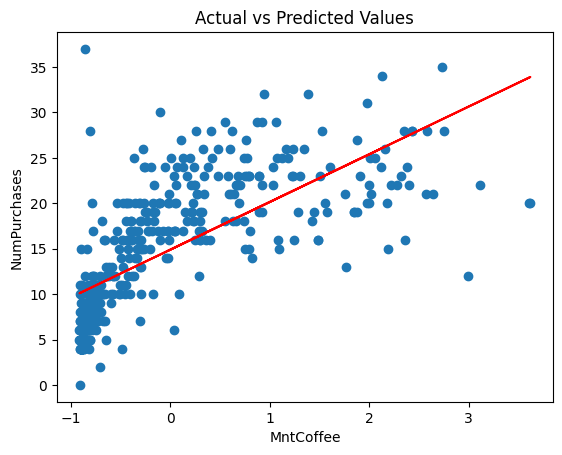

Feature : Income
    rmse    = 5.82 
    r2Score = 0.40


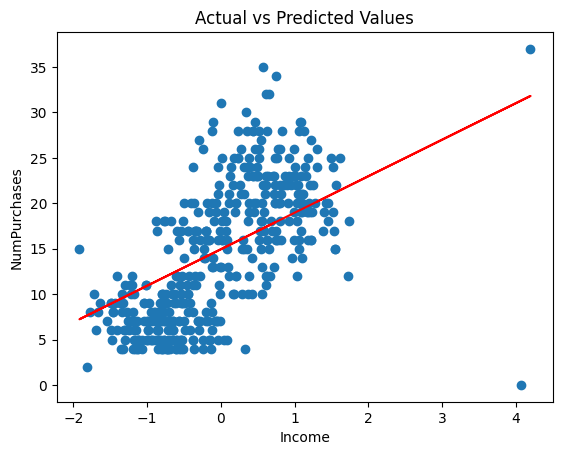

Feature : MntMeatProducts
    rmse    = 6.14 
    r2Score = 0.34


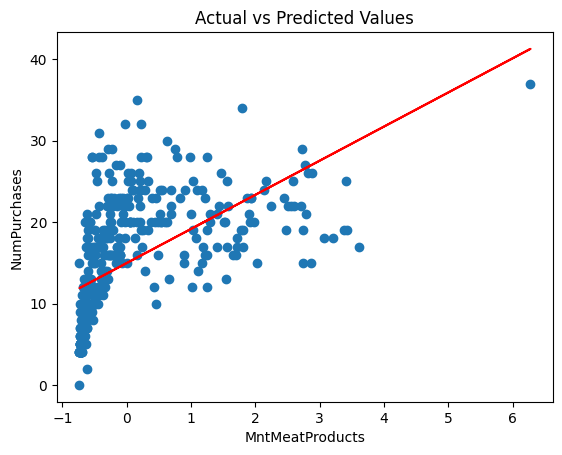

Feature : MntGoldProds
    rmse    = 6.71 
    r2Score = 0.21


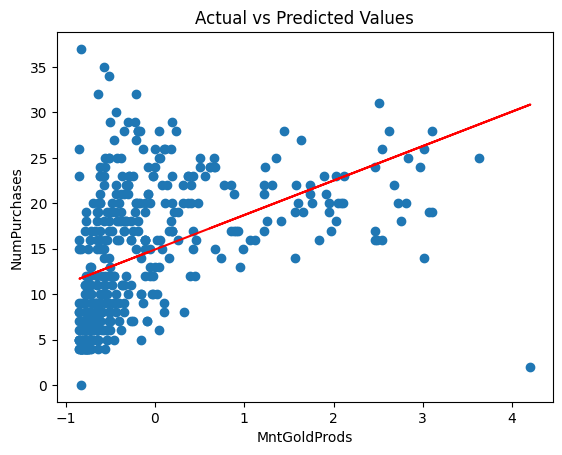

Feature : MntSweetProducts
    rmse    = 6.70 
    r2Score = 0.21


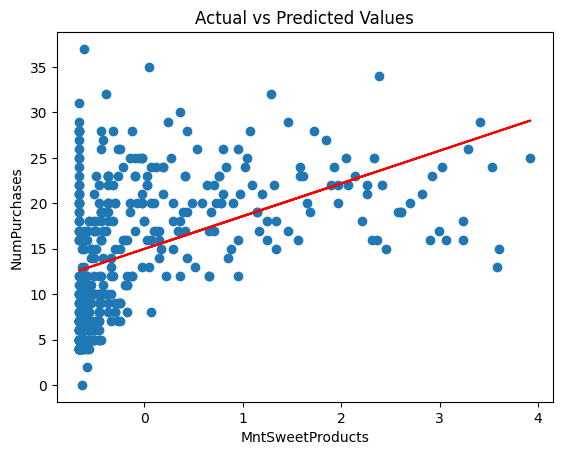

In [66]:
for feature in bestFeatures.index:
    slope, bias = simple_linear_regression(x_train[feature], y_train)
    predicts = get_regression_predictions(x_test[feature], bias, slope)
    rmse = get_root_mean_square_error(predicts, y_test)
    r2Score = get_r2_score(predicts, y_test)
    print("Feature : "+feature)
    print(f"    rmse    = {rmse:.2f} ")
    print(f"    r2Score = {r2Score:.2f}")
    plot_actual_vs_predicted(x_test[feature], y_test, predicts, feature)

# Multiple Regression

Multiple regression is a statistical technique that aims to model the relationship between a dependent variable and two or more independent variables.

Multiple regression with n independent variables is expressed as follows:

$$f(x) = \beta _{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + \beta_{3} x_{3} + \beta_{4} x_{4} + ... + \beta_{n} x_{n} + c $$

To optimize the model for accurate predictions, multiple regression commonly employs iterative algorithms such as gradient descent.

The main goal of the optimization process is to make our predictions as close as possible to the actual values.
We measure the prediction error using a cost function, usually denoted as $J(\beta)$.

$$ J(\beta)= \frac {1}{2m} Σ_{i=0}^{m-1}(y_i - (\hat \beta _{0} + \hat \beta_{1} x_{1} + \hat \beta_{2} x_{2} + \hat \beta_{3} x_{3} + \hat \beta_{4} x_{4} + ... + \hat \beta_{n} x_{n}) )^2  $$

Gradient descent iteratively adjusts the coefficients $(\beta_i)$ to minimize the cost function. The update rule for each coefficient is:

$$\beta_{i} = \beta _ {i} - \alpha \frac {∂J(\beta)}{∂\beta_{i}}$$

$$ \frac {∂J(\beta)}{∂\beta_{i}} = \frac {1}{m}Σ_{j=0}^{m-1}(y_j - (\hat \beta _{0} + \hat \beta_{1} x_{j1} + \hat \beta_{2} x_{j2} + \hat \beta_{3} x_{j3} + \hat \beta_{4} x_{j4} + ... + \hat \beta_{n} x_{jn})) x_{ji} $$



## Predicting output given regression weights

Based on the formula above and [np.dot()](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) method, complete this function to compute the predictions for an entire matrix of features given the matrix, bias, and the weights. Provide an explanation of np.dot method and the reasoning behind using this method in your code:

In [67]:
def predict_output(feature_matrix, weights, bias):
    predictions=np.dot(feature_matrix, weights)+bias
    return predictions

## Computing the Derivative

As we saw, the cost function is the sum over the data points of the squared difference between an observed output and a predicted output.

Since the derivative of a sum is the sum of the derivatives, we can compute the derivative for a single data point and then sum over data points. We can write the squared difference between the observed output and predicted output for a single point as follows:

$$
(output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))^2
$$

With n feautures and a const , So the derivative will be :


$$
2 * (output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))
$$

The term inside the paranethesis is just the error (difference between prediction and output). So we can re-write this as:

$$2 * error*[feature_i] $$


That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself. In the case of the constant then this is just twice the sum of the errors!

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors.


With this in mind, complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points).


In [68]:
def feature_derivative(errors, feature):
    derivative=2*np.dot(errors,feature)
    return derivative

## Gradient Descent

Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of increase and therefore the negative gradient is the direction of decrease and we're trying to minimize a cost function.


The amount by which we move in the negative gradient direction is called the 'step size'. We stop when we are 'sufficiently close' to the optimum. We define this by requiring that the magnitude (length) of the gradient vector to be smaller than a fixed 'tolerance'.


With this in mind, complete the following gradient descent function below using your derivative function above. For each step in the gradient descent we update the weight for each feature befofe computing our stopping criteria.

In [83]:
def regression_gradient_descent(
    feature_matrix, outputs, initial_weights, bias, step_size, tolerance
):
    weights = np.array(initial_weights)
    while True:
        predictions = predict_output(feature_matrix, weights, bias)
        errors = outputs - predictions

        gradient = -feature_derivative(feature_matrix.T, errors)
        weights -= step_size * gradient

        bias_gradient = -2 * np.sum(errors)
        bias -= step_size * bias_gradient

        if np.linalg.norm(gradient) < tolerance:
            break
    return weights, bias

In [84]:
# Utility functions for multiple regression


def normalize_features(chosen_features, data_frame):
    for feature in chosen_features:
        data_frame[feature] = (
            data_frame[feature] - data_frame[feature].mean()
        ) / data_frame[feature].std()
    return data_frame

def n_feature_regression(chosen_feature_matrix, target_matrix, keywords):
    initial_weights = keywords["initial_weights"]

    step_size = keywords["step_size"]

    tolerance = keywords["tolerance"]

    bias = keywords["bias"]

    weights, bias = regression_gradient_descent(
        chosen_feature_matrix,
        target_matrix,
        initial_weights,
        bias,
        step_size,
        tolerance,
    )

    return weights, bias
def get_weights_and_bias(chosen_features, train_x, train_y):
    """


    Computes the weights and bias for a general n feature model.


    :param chosen_features:  list of features to perform multiple regression on


    :return: chosen_feature_matrix, computed weights and bias via regression
    """

    # ToDo

    #  Would selecting different initial weights make any difference?

    #  Explain your answer.

    keywords = {
        "initial_weights": np.array([0.5] * len(chosen_features)),
        "step_size": 1.0e-4,
        "tolerance": 1.0e-10,
        "bias": 0,
    }

    chosen_feature_dataframe = train_x[chosen_features]

    # ToDo

    #  Why are the features normalized?

    chosen_feature_dataframe = normalize_features(
        chosen_features, chosen_feature_dataframe
    )
    chosen_feature_matrix = chosen_feature_dataframe.to_numpy()

    target_column = train_y

    target_matrix = target_column.to_numpy()

    train_weights, bias = n_feature_regression(
        chosen_feature_matrix, target_matrix, keywords
    )

    return chosen_feature_matrix, train_weights, bias

## Two Feature Regression

In this part, you should choose 2 features and implement multiple regression on them :

In [85]:
chosen_features = bestFeatures.head(2).index
chosen_feature_matrix, train_weights, bias =get_weights_and_bias(chosen_features, x_train, y_train)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3616\3653957874.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame[feature] = (


In [86]:
predictedValues = predict_output(x_test[bestFeatures.head(2).index], train_weights, bias)


In [87]:
rmse = get_root_mean_square_error(predictedValues, y_test)
r2Score = get_r2_score(predictedValues, y_test)
print("Features: " + ", ".join(bestFeatures.head(2).index))
print(f"    rmse    = {rmse:.2f} ")
print(f"    r2Score    = {r2Score:.2f} ")

Features: MntCoffee, Income
    rmse    = 4.89 
    r2Score    = 0.58 


## Three Feature Regression

Now repeat the steps for 3 features

In [88]:
chosen_features = bestFeatures.head(3).index
chosen_feature_matrix, train_weights, bias = get_weights_and_bias(
    chosen_features, x_train, y_train
)
predictedValues = predict_output(
    x_test[bestFeatures.head(3).index], train_weights, bias
)
rmse = get_root_mean_square_error(predictedValues, y_test)
r2Score = get_r2_score(predictedValues, y_test)
print("Features: " + ", ".join(bestFeatures.head(3).index))
print(f"    rmse    = {rmse:.2f} ")
print(f"    r2Score    = {r2Score:.2f} ")

Features: MntCoffee, Income, MntMeatProducts
    rmse    = 4.79 
    r2Score    = 0.60 


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3616\3653957874.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame[feature] = (


## Five Feature Regression

Finally, repeat the steps for 5 features

Explain the differences in the results and the reasoning behind these variations.

In [89]:
chosen_features = bestFeatures.head(5).index
chosen_feature_matrix, train_weights, bias = get_weights_and_bias(
    chosen_features, x_train, y_train
)
predictedValues = predict_output(
    x_test[bestFeatures.head(5).index], train_weights, bias
)
rmse = get_root_mean_square_error(predictedValues, y_test)
r2Score = get_r2_score(predictedValues, y_test)
print("Features: " + ", ".join(bestFeatures.head(5).index))
print(f"    rmse    = {rmse:.2f} ")
print(f"    r2Score    = {r2Score:.2f} ")

Features: MntCoffee, Income, MntMeatProducts, MntGoldProds, MntSweetProducts
    rmse    = 4.65 
    r2Score    = 0.62 


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3616\3653957874.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame[feature] = (


# Classification

In this section, we will train, test and evaluate the models. We will use the following models:

* Logistic Regression

* KNN

* Decision Tree

In [90]:
def plotConfusionMatrix(actual, predicts):
    confusion_matrix = metrics.confusion_matrix(actual,predicts)
    cm_display = metrics.ConfusionMatrixDisplay(
        confusion_matrix=confusion_matrix, display_labels=["LOW", "HIGH"]
    )
    cm_display.plot()
    plt.show()

#### Logistic Regression
Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).The ouput of Logistic Regression calculated using the sigmoid function. The sigmoid function is as follows:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

where $z$ is the activation function. The activation function is calculated using the following formula:

$$z = w_1x_1 + w_2x_2 + ... + w_nx_n + b$$

where $w_i$ is the weight of the $i^{th}$ feature, $x_i$ is the value of the $i^{th}$ feature, $b$ is the bias and $n$ is the number of features.

Logistic Regression Accuracy: 90.36%


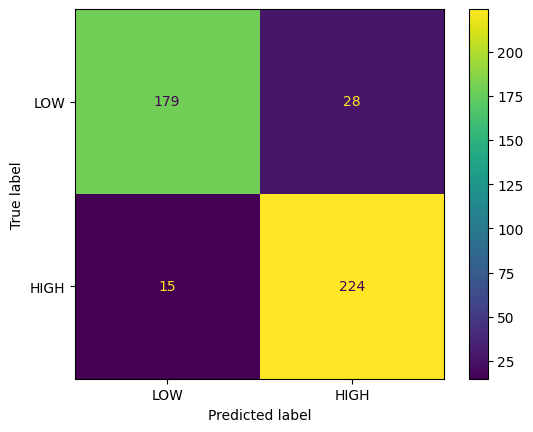

In [140]:
x_train, x_test, y_train, y_test = train_test_split(
    ppDataSet.drop(["NumPurchases", "PurchaseRate"], axis=1),
    ppDataSet["PurchaseRate"],
    test_size=0.2,
    random_state=42,
)
logR = linear_model.LogisticRegression()
logR.fit(x_train, y_train)
print(f"Logistic Regression Accuracy: {logR.score(x_test, y_test) * 100:5.2f}%")
plotConfusionMatrix(y_test,logR.predict(x_test))

As it is shown above, the accuracy of the `Logistic Regression` model can be calculated using the following formula:

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN} = \frac{224 + 179}{224 + 179 + 28 + 15} = 90.36\%$$

$TP$ : true positives count    
$TN$ : true negatives count      
$FP$ : false positives count     
$FN$ : false negatives count

#### KNN 
KNN is a classification algorithm which is based on distance. It classifies a data point based on the majority of the classes of the `k` nearest neighbors.


KNN Accuracy: 89.91%


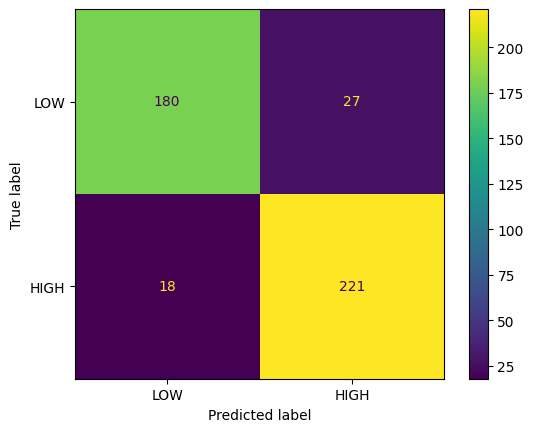

In [141]:
knn = KNeighborsClassifier(n_neighbors=70)
knn.fit(x_train, y_train)
print(f"KNN Accuracy: {knn.score(x_test, y_test) * 100:5.2f}%")
plotConfusionMatrix(y_test, knn.predict(x_test))

As it is shown above, the accuracy of the ` KNN ` model can be calculated using the following formula:

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN} = \frac{221 + 180}{221 + 180 + 27 + 18} = 89.91\%$$


#### Decision Tree
Decision tree regression examines an object's characteristics and trains a model in the shape of a tree to forecast future data and create meaningful continuous output.It classifies a data point based on the decision rules. The decision rules are based on the features and their values.

Decision Tree Accuracy: 89.69%


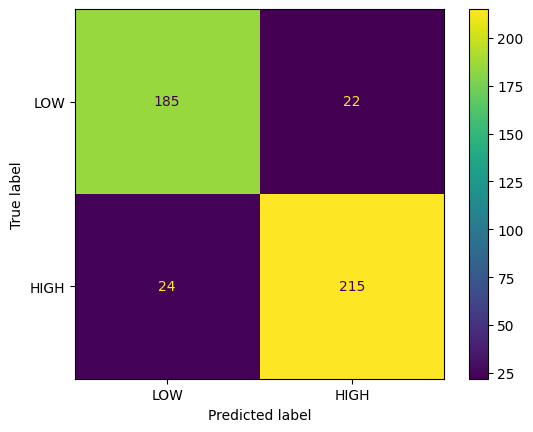

In [142]:
decisionTree = DecisionTreeClassifier(random_state=51)
decisionTree.fit(x_train, y_train)
print(f"Decision Tree Accuracy: {decisionTree.score(x_test, y_test) * 100:5.2f}%")
plotConfusionMatrix(y_test, decisionTree.predict(x_test))

As it is shown above, the accuracy of the `Logistic Regression` model can be calculated using the following formula:

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN} = \frac{215 + 183}{215 + 183 + 24 + 24} = 89.23\%$$

$TP$ : true positives count    
$TN$ : true negatives count      
$FP$ : false positives count     
$FN$ : false negatives count

### Question 20: Use GridSearchCV to find hyperparameters for models
GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model.
parameters for `GridSearchCV`:
* `estimator`: Pass the model instance for which you want to check the hyperparameters.

* `param_grid`: The dictionary object that holds the hyperparameters you want to try.

* `cv`: Number of cross-validation you have to try for each selected set of hyperparameters.

* `scoring`: Evaluation metric that you want to use, you can simply pass a valid string object of evaluation metric.    

* `verbose`: You can set it to 1 to get the detailed print out while you fit the data to GridSearchCV.     

* `n_jobs`: Number of processes you wish to run in parallel for this task if it -1 it will use all available processors.

#### Logistic Regression

Hyperparameters of the `Logistic Regression` model:

* `C`: Inverse of regularization strength. Smaller values specify stronger regularization and prevents the model from overfitting.

* `penalty`: Used to specify the norm used in the penalization. The following values can be used for this parameter:

    * `l1`: The L1 norm is the sum of the absolute values of the vector elements. (Most of the solvers don't support this parameter, so we don't use it here.)

    * `l2`: The L2 norm is the square root of the sum of the squared vector elements.

* `solver`: Logistic regression can use different optimization algorithms to find the optimal coefficients. The `solver` hyperparameter controls which algorithm to use. The most common solvers are *lbfgs*, *liblinear*, *newton-cg*, *sag*, *saga*.

In [143]:
LogisticGridSearch = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        "C": [0.01, 0.1, 1, 10, 100],
        "penalty": ["l2"],
        "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    },
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
)
LogisticGridSearch.fit(x_train, y_train)
print(f"Best Accuracy : {LogisticGridSearch.score(x_test, y_test) * 100:.2f} %")
print(f"Logistic Regression Accuracy : {logR.score(x_test, y_test) * 100:.2f} %")
print(f"Best Parameters : {LogisticGridSearch.best_params_}")

Best Accuracy : 90.36 %
Logistic Regression Accuracy : 90.36 %
Best Parameters : {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


#### KNN

Hyperparameters of the `KNN` model:

* `n_neighbors`: Number of neighbors to use by default for `kneighbors` queries.

* `metric`: The distance metric to use for the tree. The default metric is `minkowski`, and with `p=2` is equivalent to the standard Euclidean metric.

* `algorithm`: The algorithm used to compute the nearest neighbors. the options are *auto* ,*ball_tree*, *kd_tree*, and *brute*.


In [145]:
KNNGridSearch = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid={
        "n_neighbors": list(range(1, 11)) + list(range(20, 101, 10)),
        "metric": ["euclidean", "manhattan", "minkowski"],
        "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    },
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
)
KNNGridSearch.fit(x_train, y_train)
print(f"Best Accuracy : {KNNGridSearch.score(x_test, y_test) * 100:.2f} %")
print(f"KNN Accuracy: {knn.score(x_test, y_test) * 100:.2f} %")
print(f"Best Parameters : {KNNGridSearch.best_params_}")

Best Accuracy : 92.15 %
KNN Accuracy: 89.91 %
Best Parameters : {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 6}


c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [0.872538   0.88601328 0.89330564 0.90173103 0.90060114 0.90396878
 0.90958204 0.91183237 0.90733957 0.90622069 0.90622384 0.90902811
 0.90621754 0.90284676 0.90228339 0.90172631 0.8972335  0.8966717
 0.89498946 0.87589777 0.89330406 0.90453687 0.91351777 0.91239574
 0.91519687 0.91014541 0.90902024 0.90846788 0.91295597 0.91352091
 0.91296226 0.9101517  0.90341328 0.89892519 0.89667642 0.89442923
 0.89218519 0.889938   0.872538   0.88601328 0.89330564 0.90173103
 0.90060114 0.90396878 0.90958204 0.91183237 0.90733957 0.90622069
 0.90622384 0.90902811 0.90621754 0.90284676 0.90228339 0.90172631
 0.8972335  0.8966717  0.89498946 0.872538   0.88601328 0.89330564
 0.90173103 0.90060114 0.90396878 0.90958204 0.91183237 0.90733957
 0.90622069 0.90622384 0.90902811 0.90621754 0.90284676 0.90228339
 0.90172631 0.8972335  0.8966717  0.89498946 0.87589777 0.89330406

#### Decision Tree

Hyperparameters of the `Decision Tree` model:

* `criterion`: The function to measure the quality of a split. Supported criteria are `"gini"` for the Gini impurity and `"entropy"` for the information gain.

* `splitter`: The strategy used to choose the split at each node. Supported strategies are `"best"` to choose the best split and `"random"` to choose the best random split.

* `max_depth`: The maximum depth of the tree. If `None`, then nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.

* `min_samples_split`: The minimum number of samples required to split an internal node.

* `min_samples_leaf`: The minimum number of samples required to be at a leaf node.

In [146]:
DecisionTreeGridSearch = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid={
        "criterion": ["gini", "entropy"],
        "splitter": ["best", "random"],
        "max_depth": range(2, 9),
        "min_samples_split": range(2, 9),
        "min_samples_leaf": range(2, 9),
        "random_state": [54],
    },
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
)

DecisionTreeGridSearch.fit(x_train, y_train)
print(f"Best Accuracy : {DecisionTreeGridSearch.score(x_test, y_test) * 100:.2f} %")
print(f"Decision Tree Accuracy : {decisionTree.score(x_test, y_test) * 100:.2f} %")
print(f"Best Parameters are : {DecisionTreeGridSearch.best_params_}")

Best Accuracy : 91.70 %
Decision Tree Accuracy : 89.69 %
Best Parameters are : {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 54, 'splitter': 'best'}


### Question 21 : Overfitting and Underfitting
#### Overfitting:   
     
Overfitting occurs when a machine learning model learns the training data too well, to the extent that it negatively impacts its ability to generalize to new, unseen data. This usually happens when a model is excessively complex relative to the amount and noise level of the training data.
#### Underfitting:    

Underfitting occurs when a machine learning model is too simple to capture the underlying patterns in the training data. As a result, the model performs poorly not only on the training data but also on new, unseen data. 

In [147]:
## Logistic regression
print(f"Logistic Regression Accuracy for train datas: {logR.score(x_train, y_train) * 100:5.2f}%")
print(f"Logistic Regression Accuracy for test datas: {logR.score(x_test, y_test) * 100:5.2f}%")
## KNN
print(f"KNN Accuracy for train datas: {knn.score(x_train, y_train) * 100:5.2f}%")
print(f"KNN Accuracy for test datas: {knn.score(x_test, y_test) * 100:5.2f}%")
## Decision Tree
print(f"Decision Tree Accuracy for train datas: {decisionTree.score(x_train, y_train) * 100:5.2f}%")
print(f"Decision Tree Accuracy for test datas: {decisionTree.score(x_test, y_test) * 100:5.2f}%")

Logistic Regression Accuracy for train datas: 90.12%
Logistic Regression Accuracy for test datas: 90.36%
KNN Accuracy for train datas: 90.51%
KNN Accuracy for test datas: 89.91%
Decision Tree Accuracy for train datas: 100.00%
Decision Tree Accuracy for test datas: 89.69%


As you can see above for all models Accuracy for both train and test datas are good just for Decision Tree classifier accuracy for train set is 100% but however accuracy for test set is also high enough.In conclusion we don't have underfitting and overfitting in our models.      
The reason is that the models are not too complex or too simple. This is why both the training accuracy and the test accuracy are almost the same and they are high enough.

### Question 23 : Plot Decision Tree
    

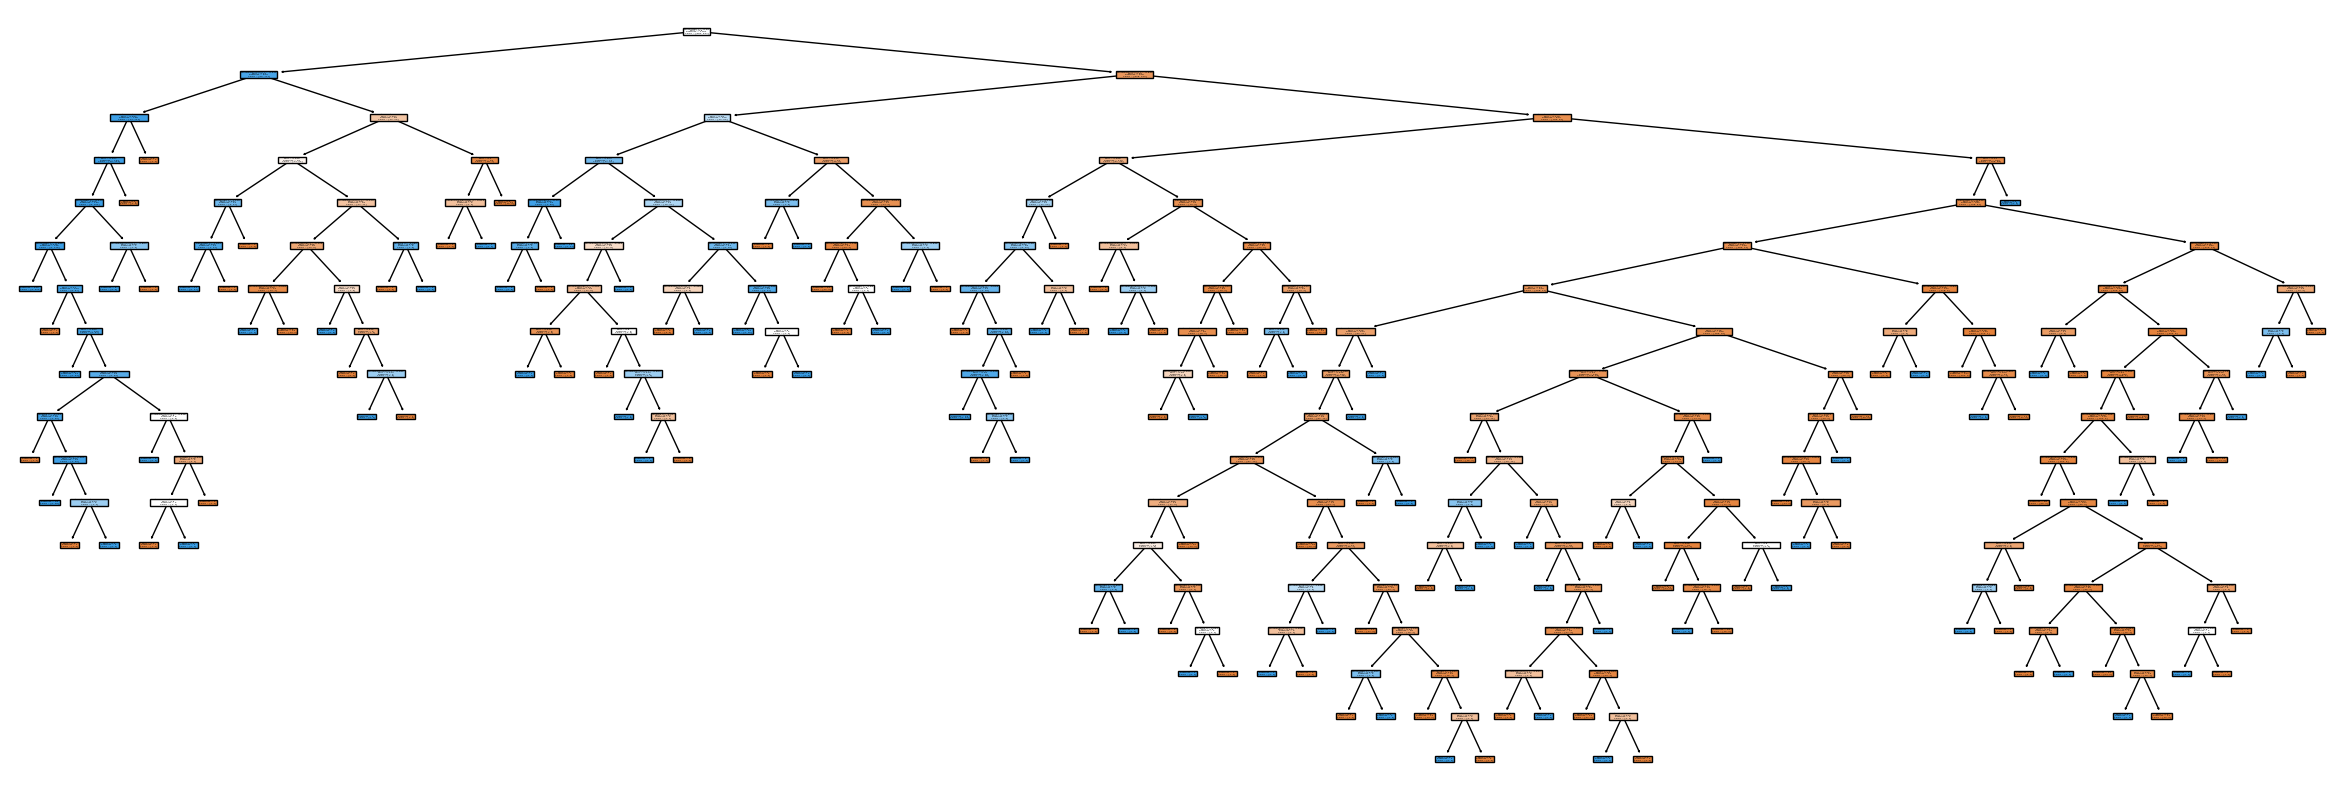

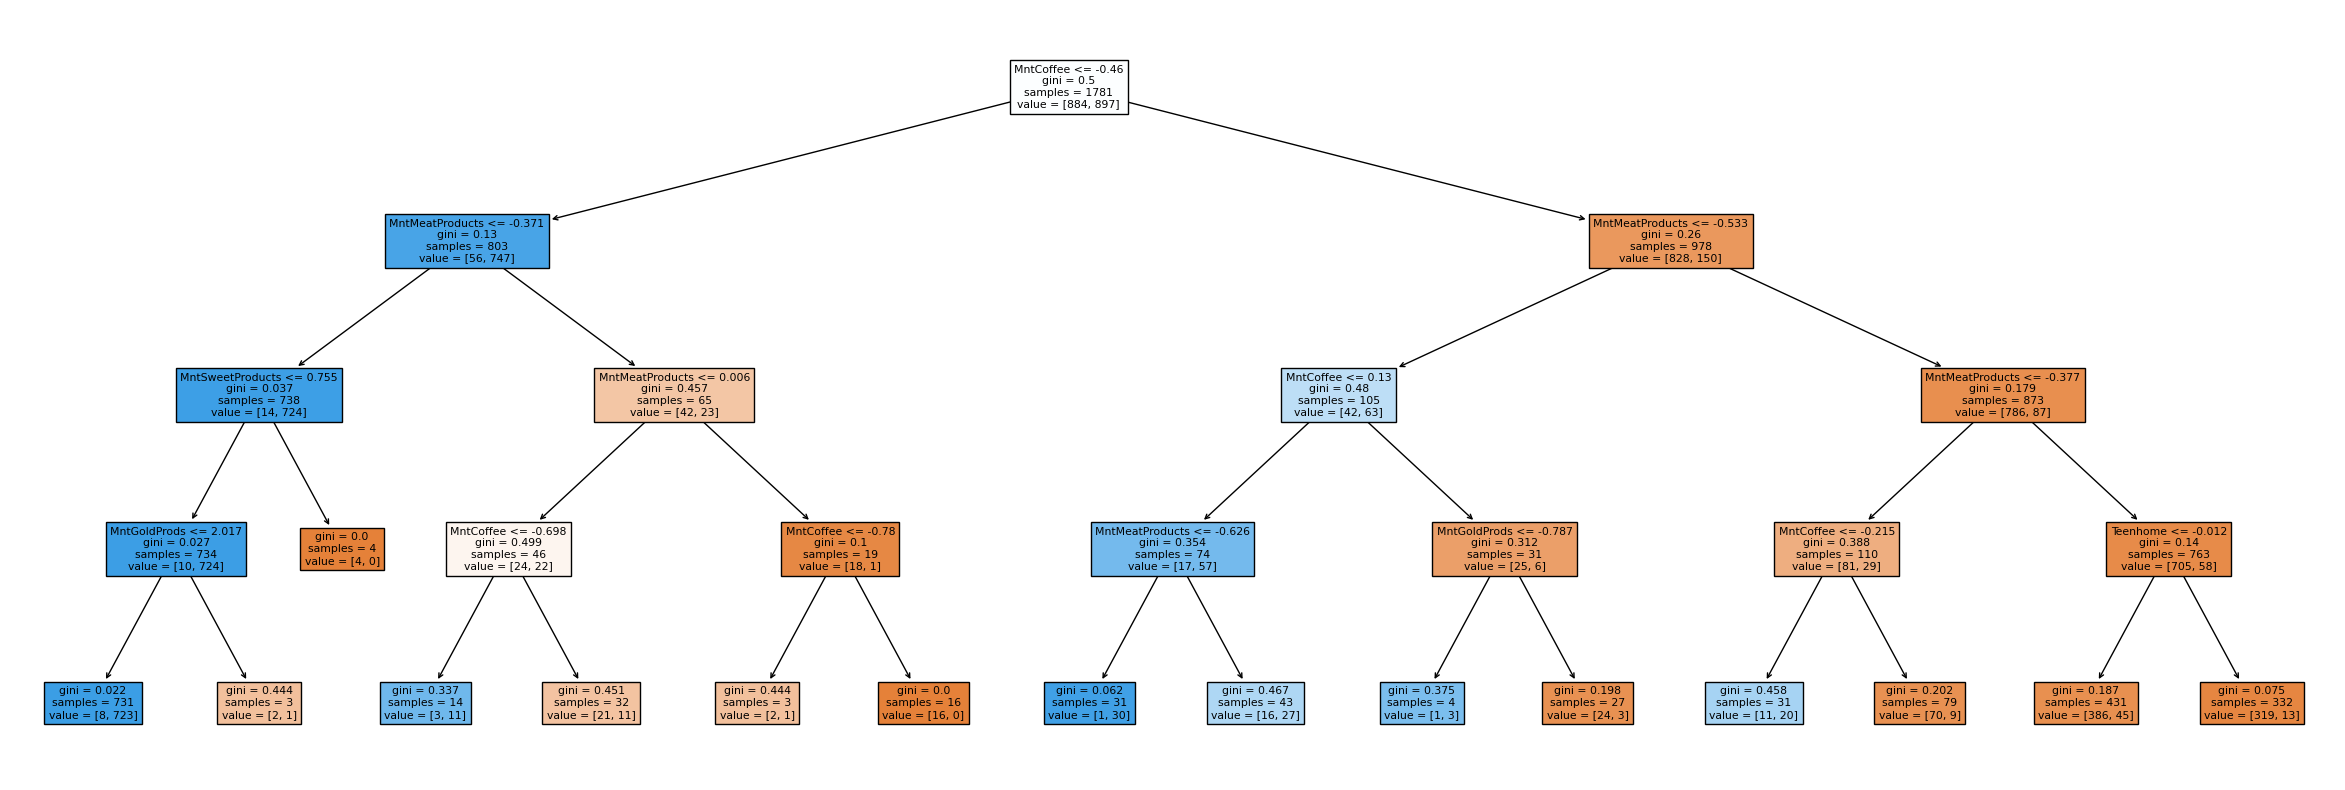

In [148]:
def plotTree(tree, feature_names_list):
    plt.figure(figsize=(30, 10))
    plot_tree(
        tree,
        filled=True,
        feature_names=feature_names_list,
    )
    plt.show()
plotTree(decisionTree, x_train.columns.tolist())
plotTree(DecisionTreeGridSearch.best_estimator_, x_train.columns.tolist())

## Ensemble Learning - RANDOM FOREST

### Question 24 - Random Forest Hyperparameters
Hyperparameters: Some of the important hyperparameters of Random Forest include:   
    
1. Number of Trees `(n_estimators)`: The number of decision trees in the forest.
2. Feature Selection Criterion `(criterion)`: The function used to measure the quality of a split, such as “gini” for Gini impurity or “entropy” for information gain.
3. Maximum Depth of the Trees `(max_depth)`: The maximum depth of the decision trees.
4. Minimum Samples for Split `(min_samples_split)`: The minimum number of samples required to split an internal node.
5. Minimum Samples per Leaf `(min_samples_leaf)`: The minimum number of samples required to be at a leaf node.
6. Maximum Features `(max_features)`: The number of features to consider when looking for the best split.

Here I use `n_estimators` and `max_depth` hyperparameters to determine their influence on the model.


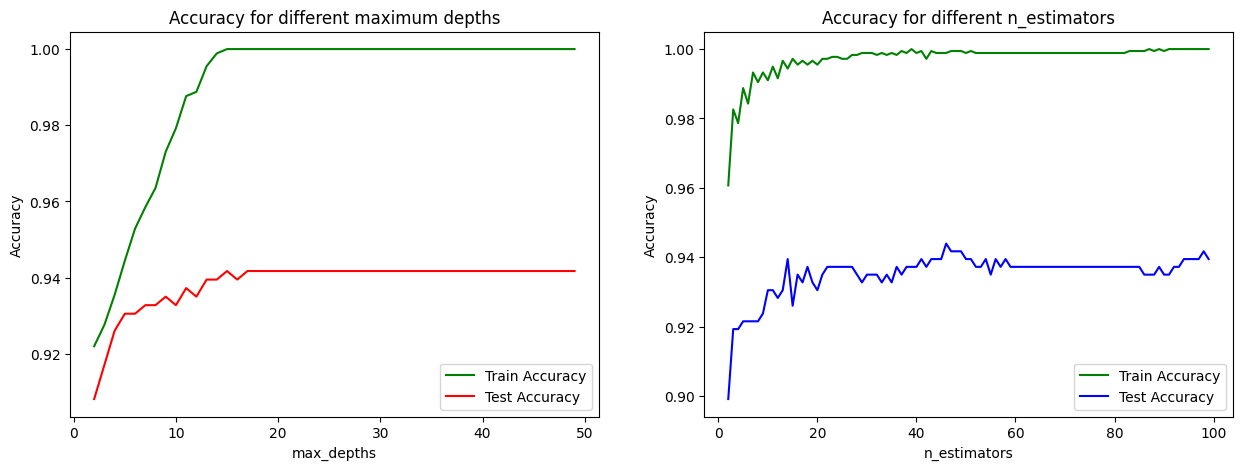

In [155]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


max_depths = range(2, 50)
n_estimators = range(2, 100)

_, ax = plt.subplots(1, 2, figsize=(15, 5))

depthsResults_test = []
depthsResults_train = []
for depth in max_depths:
    RFC = RandomForestClassifier(max_depth=depth, random_state=0)
    RFC.fit(x_train, y_train)
    depthsResults_train.append(RFC.score(x_train, y_train))
    depthsResults_test.append(RFC.score(x_test, y_test))
ax[0].plot(max_depths, depthsResults_train, "g", label="Train Accuracy")
ax[0].plot(max_depths, depthsResults_test, "r", label="Test Accuracy")
ax[0].legend()
ax[0].set_title("Accuracy for different maximum depths")
ax[0].set_xlabel("max_depths")
ax[0].set_ylabel("Accuracy")

n_estimatorsResults_test = []
n_estimatorsResults_train = []
for n in n_estimators:
    RFC = RandomForestClassifier(n_estimators=n, random_state=0)
    RFC.fit(x_train, y_train)
    n_estimatorsResults_train.append(RFC.score(x_train, y_train))
    n_estimatorsResults_test.append(RFC.score(x_test, y_test))
ax[1].plot(n_estimators, n_estimatorsResults_train, "g", label="Train Accuracy")
ax[1].plot(n_estimators, n_estimatorsResults_test, "b", label="Test Accuracy")
ax[1].legend()
ax[1].set_title("Accuracy for different n_estimators")
ax[1].set_xlabel("n_estimators")
ax[1].set_ylabel("Accuracy")

plt.show()

Increasing the `n_estimators` hyperparameter increases the number of decision trees in the Random Forest. This can help improve the performance of the model by reducing the variance of the model and making it more robust to noise in the data. However, increasing the **n_estimators** hyperparameter can also increase the training time and memory usage of the model.

Increasing the `max_depth` hyperparameter increases the maximum depth of the decision trees in the Random Forest. This can help improve the performance of the model by allowing the decision trees to capture more complex patterns in the data. However, increasing the **max_depth** hyperparameter can also increase the risk of overfitting.

It is important to note that the combination of these two parameters should be set with caution as it may result in overfitting. you have to be aware of the complexity of your model so it has a balance performance with seen and unseen data. using methods like cross-validation can result in a better performance controlling the overfitting situation.

### Question 25: Bias and Variance

In accuracy the Forest performs better which is expected due to the more generalization.

In machine learning, achieving an equilibrium between bias and variance is crucial to develop models that perform well across varied datasets. Each aspect represents different potential error sources in the learning process:

- **Bias** reflects error from erroneous assumptions in the learning algorithm. A high bias model may oversimplify the model (underfitting), failing to capture relevant relations between features and target outputs. Such a model, despite its simplicity, won't perform well on either the training data or unseen data. Low bias models, on the other hand, have the capacity to capture more complex patterns but are at risk of mirroring the training data too closely.
  
- **Variance** represents error from too much complexity in the learning algorithm. High variance models fit noise as if it were a true underlying pattern (overfitting), performing well on their training data but poorly on any new data. Models with low variance might not perform as brilliantly on the training data but generally have better performance on test data.

In the context of **Decision Trees** and **Random Forests**:

- **Decision Trees** have low bias because they maximally overfit the training data. However, they usually have high variance because they are very sensitive to small variations in the training data.

- **Random Forests** usually have low variance and low bias because they are an ensemble of many decision trees and they average out their predictions. This is done to prevent overfitting.

**Cross-Validation** can be utilized to evaluate models more reliably by dividing the data into multiple partitions and performing iterative tests. This can help in gauging how well a model will perform when introduced to unseen data.

**Regularization** adds a penalty to the loss function used to train the model, deterring it from becoming too complex and therefore steering clear of high variance. It's a useful technique to control overfitting, especially in models like neural networks or regression models where the number of features can be very large compared to the number of observations.

Ultimately, an optimal machine learning model would offer both complexity to learn the data's genuine structure (low bias) and simplicity to ensure the learned structure generalizes well to new, unseen data (low variance). Achieving this balance is one of the fundamental challenges in machine learning, particularly in fields requiring predictive modeling. Random Forests are a step towards this balance, as they are designed to reduce variance without significantly increasing bias, but they come with an increase in computational cost.

In [168]:
tree = DecisionTreeClassifier(
    criterion="gini",
    max_depth=None,
    min_samples_leaf=8,
    min_samples_split=2,
    random_state=54,
    splitter="random",
)
forest = RandomForestClassifier(
    criterion="gini", max_depth=7, min_samples_split=2, random_state=54
)

_, treeBias, treeVariance = bias_variance_decomp(
    estimator=tree,
    X_train=x_train.values,
    y_train=y_train.values,
    X_test=x_test.values,
    y_test=y_test.values,
    loss="mse",
    num_rounds=100,
    random_seed=1,
)

_, forestBias, forestVariance = bias_variance_decomp(
    estimator=forest,
    X_train=x_train.values,
    y_train=y_train.values,
    X_test=x_test.values,
    y_test=y_test.values,
    loss="mse",
    num_rounds=100,
    random_seed=1,
)

print("TREE:")
print(f"    Bias = {treeBias:.3f}")
print(f"    Variance = {treeVariance:.3f}")
print("FOREST:")
print(f"    Bias = {forestBias:.3f}")
print(f"    Variance = {forestVariance:.3f}")

TREE:
    Bias = 0.060
    Variance = 0.039
FOREST:
    Bias = 0.064
    Variance = 0.011


As mentioned before, `Decision Tree` has lower bias than `Random Forest` because of the overfitting. However, `Random Forest` has lower variance than `Decision Tree` because of the averaging out of the predictions.However Bias is nearly same for `Decision Tree` and `Random Forest`.

## Differential Privacy

### Question 26

When we want to keep people’s information safe in a set of data, we often make changes to the details that can point to who they are. Think of it like blurring out faces in a picture. One usual way to do this is by adding some “noise,” or random messiness, to the data.

Why do we add noise? It’s like adding a few fake puzzle pieces. If someone tries to figure out who’s in the picture, it gets harder because the pieces don’t fit perfectly. This is important to stop clever people who are trying to guess someone’s identity by looking for patterns in the data.

But there’s a tricky part. When we add noise, we also make the data a bit less clear. It’s not as sharp for people who need to study the information, like scientists or doctors who want to learn from the data.

That’s where “differential privacy” comes in. Think of it as a secret recipe for how much blur to add. It helps us make sure that people’s private info stays hidden, but the big picture is still useful for learning things. It’s like making sure you can still see the forest, even if we’ve made some of the trees a bit fuzzy.

### Q27 - The Contrast Between Exponential and Laplace Noise   

When we talk about keeping data private, two types of “noise,” or randomness, come up: Exponential and Laplace noise. They both mix up our data a bit to keep it safe and private, but they do it in different ways.

`Exponential Noise` (Gaussian Mechanism):      
    
Imagine you have a secret recipe that changes a bit every time you share it with someone to keep the original secret. This is like exponential noise. It’s a type of noise from the Gaussian (which is a fancy word for a bell-shaped curve) family. When we add this noise to our data, we base it on how sensitive that data is. Sensitive here means how much the information we get out changes when we change something we put in.    

Now, the strength of this secret-keeping is linked to something called a privacy budget, and we mark it with the Greek letter ε (epsilon). If we set a low ε, we’re using a strong privacy setting, but our data might end up looking pretty messy. If we increase ε, we get cleaner data, but our privacy isn’t as tight. It’s all about finding a good balance.

`Laplace Noise`:    

Using the same secret recipe idea, Laplace noise does a similar thing but with a key difference. It adds noise based on how sensitive the data is, just like exponential noise. But instead of a bell curve, imagine a wider, flatter hat. This means the noise can sometimes be a little bigger than what we’d see with exponential noise.    

With Laplace noise, because it has these wide edges or “heavy tails,” there’s a higher chance of adding more noise. This type of noise is handy when the stuff we’re measuring doesn’t change too much and when we’re working with a tight privacy budget, a small ε. It gives solid privacy without having to mess up the data too much.

### Question 28
Here we use the Laplace noise. As loc we use 0 and for the variance we have :
$$scale = \frac{{ \text{sensitivity}}}{{\epsilon}}$$

In [169]:
def addNoise(data, epsilon=1.0,sensitivity=1.0):
    scale = sensitivity / epsilon
    noise = np.random.laplace(0, scale=scale, size=data.shape)
    return data + noise

In [170]:
## add noise to Train Data set & Test Data set
xTrainsNoisy = []
xTestsNoisy = []
sensitivityRange = [0.1, 0.5, 1.0, 2.0]
for sensitivity in sensitivityRange:
    xTrainsNoisy.append(addNoise(x_train, sensitivity=sensitivity))
    xTestsNoisy.append(addNoise(x_test, sensitivity=sensitivity))

Now we should train and test our models with noisy datas

#### Logistic Regression

Logistic Regression best Accuracy is : 90.36 %


Text(0.5, 1.0, 'Logistic Regression Accuracy with noise')

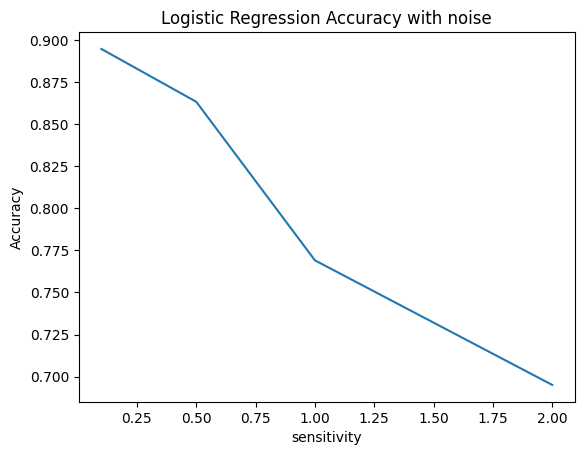

In [172]:
results = []
for i in range(len(sensitivityRange)):
    LogisticGridSearch_noisy = GridSearchCV(
        estimator=LogisticRegression(),
        param_grid={
            "C": [0.01, 0.1, 1, 10, 100],
            "penalty": ["l2"],
            "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
        },
        scoring="accuracy",
        cv=5,
        n_jobs=-1)

    LogisticGridSearch_noisy.fit(xTrainsNoisy[i], y_train)
    results.append(LogisticGridSearch_noisy.score(xTestsNoisy[i], y_test))
print(f"Logistic Regression best Accuracy is : {LogisticGridSearch.score(x_test,y_test) * 100:.2f} %")
plt.plot(sensitivityRange, results)
plt.xlabel("sensitivity")
plt.ylabel("Accuracy")
plt.title("Logistic Regression Accuracy with noise")

#### KNN

c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [0.87028767 0.8949926  0.90341485 0.90172788 0.90453687 0.90341485
 0.90565889 0.90678091 0.90677934 0.90677934 0.90173103 0.90116766
 0.90173103 0.896678   0.89162182 0.89162182 0.89218204 0.89105687
 0.88881283 0.8742171  0.90004878 0.90116766 0.90622069 0.90621912
 0.91183237 0.90678249 0.91071035 0.90734429 0.91071035 0.90566047
 0.90566047 0.89723979 0.89330878 0.889938   0.88881755 0.88881755
 0.88657193 0.88544991 0.87028767 0.8949926  0.90341485 0.90172788
 0.90453687 0.90341485 0.90565889 0.90678091 0.90677934 0.90677934
 0.90173103 0.90116766 0.90173103 0.896678   0.89162182 0.89162182
 0.89218204 0.89105687 0.88881283 0.87028767 0.8949926  0.90341485
 0.90172788 0.90453687 0.90341485 0.90565889 0.90678091 0.90677934
 0.90677934 0.90173103 0.90116766 0.90173103 0.896678   0.89162182
 0.89162182 0.89218204 0.89105687 0.88881283 0.8742171  0.9000487

KNN best Accuracy is : 92.15 %


c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [0.59182482 0.58058414 0.60697605 0.61930885 0.63391559 0.64121581
 0.64401379 0.6462594  0.66028704 0.65354074 0.66928839 0.68218613
 0.6776949  0.67938344 0.67769962 0.68218928 0.67713782 0.67377333
 0.675454   0.58620527 0.57945583 0.61482391 0.62659963 0.63784188
 0.63782929 0.64513581 0.64625311 0.64961917 0.65355648 0.67096119
 0.67939445 0.69510119 0.68836276 0.69734838 0.69229535 0.69004815
 0.69397602 0.69116703 0.59182482 0.58058414 0.60697605 0.61930885
 0.63391559 0.64121581 0.64401379 0.6462594  0.66028704 0.65354074
 0.66928839 0.68218613 0.6776949  0.67938344 0.67769962 0.68218928
 0.67713782 0.67377333 0.675454   0.59182482 0.58058414 0.60697605
 0.61930885 0.63391559 0.64121581 0.64401379 0.6462594  0.66028704
 0.65354074 0.66928839 0.68218613 0.6776949  0.67938344 0.67769962
 0.68218928 0.67713782 0.67377333 0.675454   0.58620527 0.5794558

Text(0.5, 1.0, 'KNN Accuracy with noise')

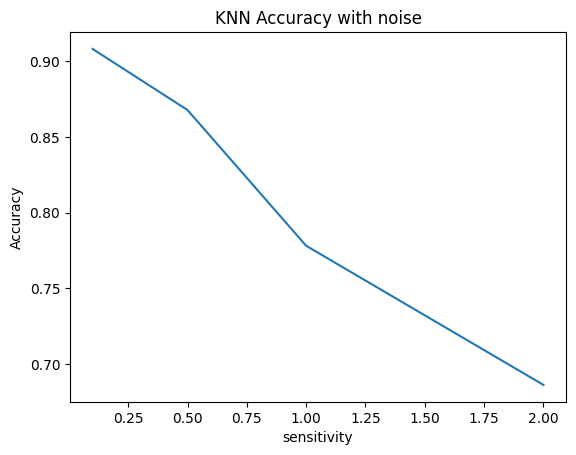

In [175]:
results = []
for i in range(len(sensitivityRange)):
    KNNGridSearch_noisy = GridSearchCV(
        estimator=KNeighborsClassifier(),
        param_grid={
            "n_neighbors": list(range(1, 11)) + list(range(20, 101, 10)),
            "metric": ["euclidean", "manhattan", "minkowski"],
            "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
        },
        scoring="accuracy",
        cv=5,
        n_jobs=-1,
    )

    KNNGridSearch_noisy.fit(xTrainsNoisy[i], y_train)
    results.append(KNNGridSearch_noisy.score(xTestsNoisy[i], y_test))
print(f"KNN best Accuracy is : {KNNGridSearch.score(x_test,y_test) * 100:.2f} %")
plt.plot(sensitivityRange, results)
plt.xlabel("sensitivity")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy with noise")

Decision Tree best Accuracy is : 89.69 %


Text(0.5, 1.0, 'Decision Tree Accuracy with noise')

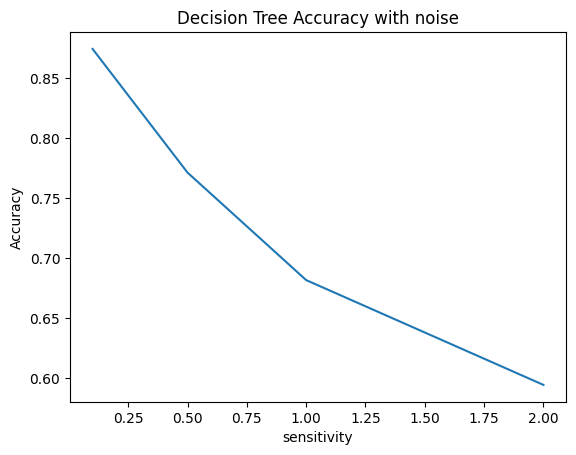

In [176]:
results = []
for i in range(len(sensitivityRange)):
    decisionTree_noisy = DecisionTreeClassifier()
    decisionTree_noisy.fit(xTrainsNoisy[i], y_train)
    results.append(decisionTree_noisy.score(xTestsNoisy[i], y_test))
print(
    f"Decision Tree best Accuracy is : {decisionTree.score(x_test,y_test) * 100:.2f} %"
)
plt.plot(sensitivityRange, results)
plt.xlabel("sensitivity")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy with noise")

As you can see the more noises the less accuracy. The other thing to notice here is that on an average the models with noise perform a bit worse than the models without noise. 

## Gradient Boosting

### Question 29 : How Gradient-Boosting works?Differences between boosting tree and decision tree

`Gradient boosting` is a way to make better predictions by combining simpler prediction models—like decision trees—to form a more powerful one. It carefully adds new models to fix errors from earlier ones. With each addition, it’s like the model gets smarter, avoiding past mistakes. This technique also uses a strategy called gradient descent to make the combined predictions as accurate as possible by reducing errors. Plus, it has special checks to keep the model from being too complex and just memorizing the data, which helps it to make good guesses on new, unseen data.

Differences:

Model Teamwork vs. Solo Player: Think of a decision tree as a lone ranger, deciding based on its own tree of questions. Gradient boosting, on the other hand, is like a team where each member corrects the others to get to a better answer together.

Learning Step-by-Step: A decision tree is built all at once—like a flowchart—dividing up the data. But gradient boosting is about taking it step by step, starting with one model and then slowly improving by adding new models to fix previous mistakes.

Complex Pattern Mastery vs. Simplicity: A single decision tree can get really detailed, learning complicated stuff in the data. But it can get too caught up in those details. Gradient boosting uses simpler, less detailed trees to make sure it learns the big picture without going overboard.

Keeping It Simple: While decision trees can get complex quickly and risk fitting the training data too closely, gradient boosting uses special rules to stay simple enough to be effective on new data it hasn’t seen before.

### Question 30 : How XGBoost works?

`XGBoost`, short for Extreme Gradient Boosting, is a smarter way of using decision trees to predict stuff. It’s like a team of mini-decision-makers, each learning from the last, to get better step by step. The magic of XGBoost lies in its formula for success: it cleverly blends two things—the measure of mistakes (loss function) and a rulebook (regularization) that keeps things tidy and simple.

At the beginning, XGBoost starts super simple—it guesses the average for everything. Then, with each round, it looks at where it went wrong, calculating the gradients, which are like signposts pointing towards fewer mistakes. The next tree in the lineup uses these hints to get closer to the right answer.

What’s really neat is how each new tree is focused on improving from the last one’s errors, gradually making the whole team smarter. And to avoid just memorizing the answers,  `XGBoost` doesn’t let any tree get too complicated—no overgrown branches here!

Building the trees is like constructing a building from the ground up but smartly, looking for the best places to put the foundations (splits) one level at a time. After building, it even trims off the excess, keeping just what it needs to score well on the tests.

When it’s showtime, `XGBoost` combines the know-how of all its trees, taking the best from each to make a solid guess. Imagine a choir where everyone’s voice is tuned just right to hit the perfect note—that’s how XGBoost makes its final prediction.

`XGBoost` also comes with dials and switches (hyperparameters), letting users tweak everything from how fast it learns to how complex the trees can be. It’s a bit like a video game where adjusting the settings can help you win, only this game’s prize is the most accurate predictions possible.

### Question 31 : Hyperparameters of the `XGBClassifier`
1. `learning_rate`: This dial tweaks how much each tree influences the final decision. Turning it down means each tree gently nudges the outcome, which could mean needing more trees for a strong model.

2. `max_depth`: This knob controls how tall each decision tree grows. Taller trees can suss out more intricate data patterns but might get hung up on the small stuff and miss the forest for the trees.

3. `n_estimators`: This setting is all about numbers—it's how many trees you're planting in the model's forest. More trees can lead to smarter models, but too many might just memorize the training book, and they'll take longer to get ready.

4. `gamma`: This is like setting a hurdle for making a decision—if the improvement isn't big enough to clear the bar, the model won't bother with a split. It's a way of saying, "Don't sweat the small stuff."

In [178]:
XGBoostGridSearch = GridSearchCV(
    estimator=XGBClassifier(),
    param_grid={
        "max_depth": range(3, 11, 2),
        "learning_rate": [0.01, 0.03, 0.09, 0.1],
        "n_estimators": range(20, 201, 30),
        "gamma": [0, 1, 10, 100],
    },
    cv=5,
    scoring="accuracy",
)
XGBoostGridSearch.fit(x_train, y_train)
print(f"Best Accuracy in train data is : {XGBoostGridSearch.best_score_ * 100:.2f} %")
print(f"Best Accuracy in test data is : {XGBoostGridSearch.score(x_test, y_test) * 100:.2f} %")
print(f"Best Parameters are : {XGBoostGridSearch.best_params_}")

Best Accuracy in train data is : 92.14 %
Best Accuracy in test data is : 93.05 %
Best Parameters are : {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
